# Telecom Churn
Business Objective:Customer churn is a big problem for telecommunications companies. Indeed, their annual churn rates are usually higher than 10%. For that reason, they develop strategies to keep as many clients as possible. This is a classification project since the variable to be predicted is binary (churn or loyal customer). The goal here is to model churn probability, conditioned on the customer features telecommunications. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

pd.set_option("display.max_columns", None)

In [2]:
#Load the data
data = pd.read_excel('Churn.xlsx')
data.head(5)

,Unnamed: 0,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
0,1,KS,area_code_415,128,yes,25,no,10.0,3,2.70,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,1,no
1,2,OH,area_code_415,107,yes,26,no,13.7,3,3.70,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,1,no
2,3,NJ,area_code_415,137,no,0,no,12.2,5,3.29,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,0,no
3,4,OH,area_code_408,84,no,0,yes,6.6,7,1.78,299.4,71,50.9,61.9,88,5.26,196.9,89,8.86,2,no
4,5,OK,area_code_415,75,no,0,yes,10.1,3,2.73,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,3,no


In [3]:
data.drop(["Unnamed: 0"], axis=1, inplace=True)
data.head(5)

,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
0,KS,area_code_415,128,yes,25,no,10.0,3,2.70,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,1,no
1,OH,area_code_415,107,yes,26,no,13.7,3,3.70,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,1,no
2,NJ,area_code_415,137,no,0,no,12.2,5,3.29,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,0,no
3,OH,area_code_408,84,no,0,yes,6.6,7,1.78,299.4,71,50.9,61.9,88,5.26,196.9,89,8.86,2,no
4,OK,area_code_415,75,no,0,yes,10.1,3,2.73,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,3,no


In [4]:
data.shape

(5000, 20)

In [5]:
#Checking for Null Values
data.isnull().sum()

state             0
area.code         0
account.length    0
voice.plan        0
voice.messages    0
intl.plan         0
intl.mins         0
intl.calls        0
intl.charge       0
day.mins          0
day.calls         0
day.charge        0
eve.mins          0
eve.calls         0
eve.charge        0
night.mins        0
night.calls       0
night.charge      0
customer.calls    0
churn             0
dtype: int64

In [6]:
#Checking Data types
data.dtypes

state              object
area.code          object
account.length      int64
voice.plan         object
voice.messages      int64
intl.plan          object
intl.mins         float64
intl.calls          int64
intl.charge       float64
day.mins          float64
day.calls           int64
day.charge         object
eve.mins           object
eve.calls           int64
eve.charge        float64
night.mins        float64
night.calls         int64
night.charge      float64
customer.calls      int64
churn              object
dtype: object

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   state           5000 non-null   object 
 1   area.code       5000 non-null   object 
 2   account.length  5000 non-null   int64  
 3   voice.plan      5000 non-null   object 
 4   voice.messages  5000 non-null   int64  
 5   intl.plan       5000 non-null   object 
 6   intl.mins       5000 non-null   float64
 7   intl.calls      5000 non-null   int64  
 8   intl.charge     5000 non-null   float64
 9   day.mins        5000 non-null   float64
 10  day.calls       5000 non-null   int64  
 11  day.charge      5000 non-null   object 
 12  eve.mins        5000 non-null   object 
 13  eve.calls       5000 non-null   int64  
 14  eve.charge      5000 non-null   float64
 15  night.mins      5000 non-null   float64
 16  night.calls     5000 non-null   int64  
 17  night.charge    5000 non-null   f

In [8]:
# Convert "day.charge" and "eve.mins" columns to float64
data["day.charge"] = data["day.charge"].astype(float)
data["eve.mins"] = data["eve.mins"].astype(float)

# Print the updated data types of the columns
print(data[["day.charge", "eve.mins"]].dtypes)

day.charge    float64
eve.mins      float64
dtype: object


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   state           5000 non-null   object 
 1   area.code       5000 non-null   object 
 2   account.length  5000 non-null   int64  
 3   voice.plan      5000 non-null   object 
 4   voice.messages  5000 non-null   int64  
 5   intl.plan       5000 non-null   object 
 6   intl.mins       5000 non-null   float64
 7   intl.calls      5000 non-null   int64  
 8   intl.charge     5000 non-null   float64
 9   day.mins        5000 non-null   float64
 10  day.calls       5000 non-null   int64  
 11  day.charge      4993 non-null   float64
 12  eve.mins        4976 non-null   float64
 13  eve.calls       5000 non-null   int64  
 14  eve.charge      5000 non-null   float64
 15  night.mins      5000 non-null   float64
 16  night.calls     5000 non-null   int64  
 17  night.charge    5000 non-null   f

In [10]:
#Finding Missing Values
data.isnull().sum()

state              0
area.code          0
account.length     0
voice.plan         0
voice.messages     0
intl.plan          0
intl.mins          0
intl.calls         0
intl.charge        0
day.mins           0
day.calls          0
day.charge         7
eve.mins          24
eve.calls          0
eve.charge         0
night.mins         0
night.calls        0
night.charge       0
customer.calls     0
churn              0
dtype: int64

In [11]:
#Drop missing values
data = data.dropna()

In [12]:
data.isnull().sum()

state             0
area.code         0
account.length    0
voice.plan        0
voice.messages    0
intl.plan         0
intl.mins         0
intl.calls        0
intl.charge       0
day.mins          0
day.calls         0
day.charge        0
eve.mins          0
eve.calls         0
eve.charge        0
night.mins        0
night.calls       0
night.charge      0
customer.calls    0
churn             0
dtype: int64

In [13]:
data.shape

(4969, 20)

In [14]:
#Checking for Dupliacte Values
len(data[data.duplicated()])

0

In [15]:
data.nunique()

state               51
area.code            3
account.length     218
voice.plan           2
voice.messages      48
intl.plan            2
intl.mins          170
intl.calls          21
intl.charge        170
day.mins          1957
day.calls          123
day.charge        1957
eve.mins          1875
eve.calls          126
eve.charge        1655
night.mins        1849
night.calls        131
night.charge      1028
customer.calls      10
churn                2
dtype: int64

In [16]:
data.columns

Index(['state', 'area.code', 'account.length', 'voice.plan', 'voice.messages',
       'intl.plan', 'intl.mins', 'intl.calls', 'intl.charge', 'day.mins',
       'day.calls', 'day.charge', 'eve.mins', 'eve.calls', 'eve.charge',
       'night.mins', 'night.calls', 'night.charge', 'customer.calls', 'churn'],
      dtype='object')

In [17]:
#Description of Data set
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
state,4969,51,WV,158,NaN,NaN,NaN,NaN,NaN,NaN,NaN
area.code,4969,3,area_code_415,2479,NaN,NaN,NaN,NaN,NaN,NaN,NaN
account.length,4969.0,NaN,NaN,NaN,100.206681,39.695476,1.0,73.0,100.0,127.0,243.0
voice.plan,4969,2,no,3654,NaN,NaN,NaN,NaN,NaN,NaN,NaN
voice.messages,4969.0,NaN,NaN,NaN,7.75488,13.545738,0.0,0.0,0.0,17.0,52.0
intl.plan,4969,2,no,4499,NaN,NaN,NaN,NaN,NaN,NaN,NaN
intl.mins,4969.0,NaN,NaN,NaN,10.264198,2.761996,0.0,8.5,10.3,12.0,20.0
intl.calls,4969.0,NaN,NaN,NaN,4.433085,2.459495,0.0,3.0,4.0,6.0,20.0
intl.charge,4969.0,NaN,NaN,NaN,2.771851,0.745672,0.0,2.3,2.78,3.24,5.4
day.mins,4969.0,NaN,NaN,NaN,180.306178,53.931206,0.0,143.7,180.1,216.2,351.5


In [18]:
#All continous variables in cname
cname = data.columns[(data.dtypes=="float64")|(data.dtypes=="int64")].tolist()
print(cname)

#All categorical var in cat_names and removing target var
cat_names = data.select_dtypes(exclude=np.number).columns.tolist()
cat_names.remove('churn')
cat_names

['account.length', 'voice.messages', 'intl.mins', 'intl.calls', 'intl.charge', 'day.mins', 'day.calls', 'day.charge', 'eve.mins', 'eve.calls', 'eve.charge', 'night.mins', 'night.calls', 'night.charge', 'customer.calls']


['state', 'area.code', 'voice.plan', 'intl.plan']

# Area Code Analysis

In [19]:
data['area.code']=data['area.code'].map({'area_code_415':'415','area_code_408':'408','area_code_510':'510'})

In [20]:
#Unique Values of Area Code
data["area.code"].unique()

array(['415', '408', '510'], dtype=object)

In [21]:
#Unique Counts of Area Code
print(data['area.code'].value_counts())

415    2479
408    1249
510    1241
Name: area.code, dtype: int64


<Axes: xlabel='area.code', ylabel='count'>

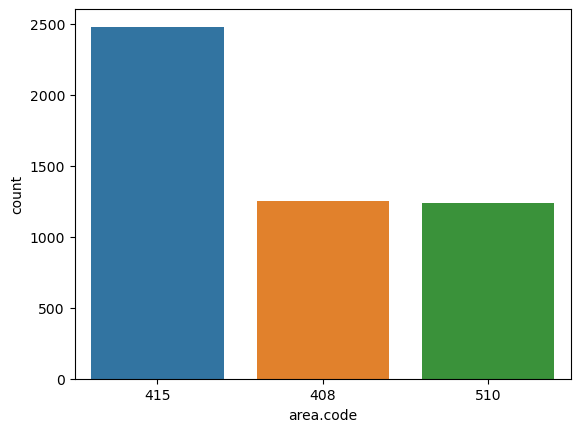

In [22]:
#Area Code by using Counterplot
sns.countplot(x=data['area.code'])

# Voice Plan Analysis

In [23]:
#Unique Values of Voiceplan
data['voice.plan'].unique()

array(['yes', 'no'], dtype=object)

In [24]:
#Unique Counts of Voiceplan
print(data['voice.plan'].value_counts())

no     3654
yes    1315
Name: voice.plan, dtype: int64


<Axes: xlabel='voice.plan', ylabel='count'>

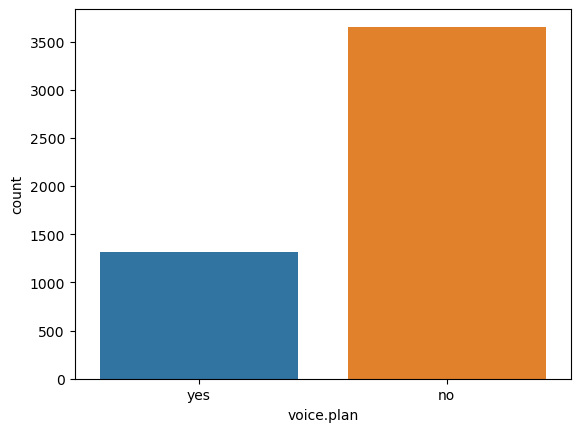

In [25]:
#Voice Plan by using Counterplot
sns.countplot(x=data['voice.plan'])

# International Plan Analysis

In [26]:
#Unique Values of International Plan
data['intl.plan'].unique()

array(['no', 'yes'], dtype=object)

In [27]:
#Unique Counts of International Plan
print(data['intl.plan'].value_counts())

no     4499
yes     470
Name: intl.plan, dtype: int64


<Axes: xlabel='intl.plan', ylabel='count'>

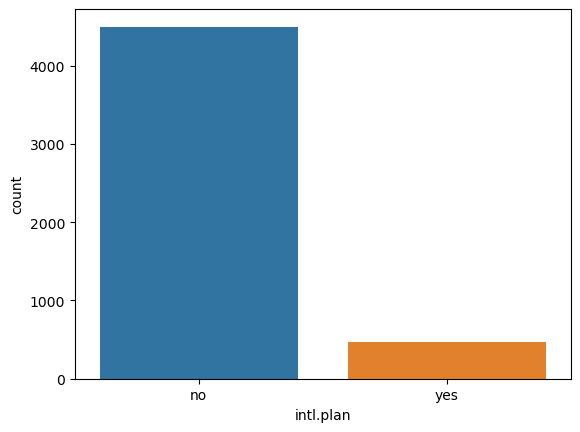

In [28]:
#International Plan by using Counterplot
sns.countplot(x=data['intl.plan'])

# State Analysis

In [29]:
#Unique Values of State
data['state'].unique()

array(['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI',
       'MT', 'IA', 'NY', 'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC',
       'NE', 'WY', 'HI', 'IL', 'NH', 'GA', 'AK', 'MD', 'AR', 'WI', 'OR',
       'MI', 'UT', 'CA', 'MN', 'SD', 'NC', 'WA', 'NM', 'NV', 'DC', 'KY',
       'ME', 'MS', 'DE', 'TN', 'PA', 'CT', 'ND'], dtype=object)

In [30]:
#Unique Counts of State
print(data['state'].value_counts())

WV    158
MN    124
AL    123
ID    119
VA    117
OH    115
WY    115
OR    114
NY    114
TX    113
UT    111
NJ    111
WI    105
MA    103
MI    102
ME    102
MD    102
VT    100
KY     99
MS     99
CT     99
RI     99
IN     98
WA     98
KS     98
MT     97
CO     95
NH     95
MO     93
DE     92
AR     92
SC     91
NM     91
NC     90
AZ     89
FL     89
NV     89
OK     89
TN     88
IL     88
NE     88
DC     87
ND     87
SD     85
HI     85
GA     83
LA     81
PA     77
AK     70
IA     68
CA     52
Name: state, dtype: int64


<Axes: xlabel='state', ylabel='count'>

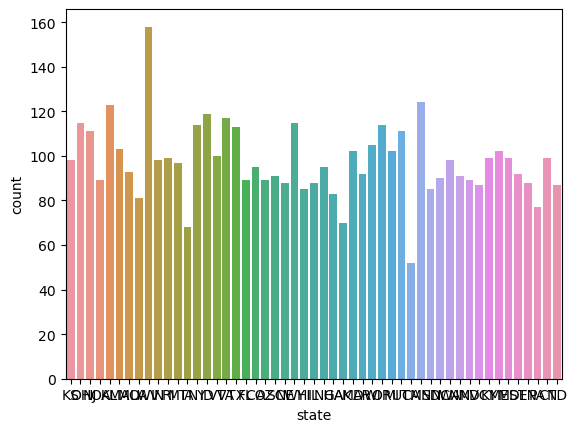

In [31]:
#State by using Counterplot
sns.countplot(x=data['state'])

# Churn Analysis

In [32]:
#Unique Values of Churn
data['churn'].unique()

array(['no', 'yes'], dtype=object)

In [33]:
#Unique Counts of Churn
print(data['churn'].value_counts())

no     4264
yes     705
Name: churn, dtype: int64


<Axes: xlabel='churn', ylabel='count'>

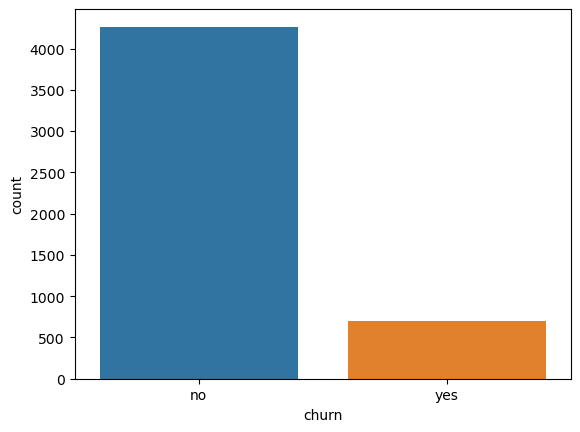

In [34]:
#Churn by using Counterplot
sns.countplot(x=data.churn)

- Few things we need to minimize the influence of inbalanced dataset :
- Resample Data
- Collect more Sample
- Use precision and recall as accuracy metrics

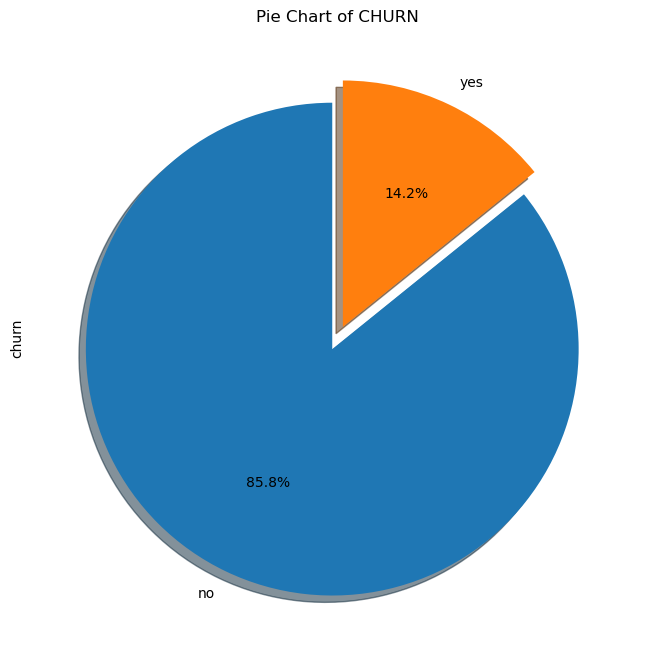

In [35]:
#Analysing CHURN by using Pie Chart
data['churn'].value_counts().plot.pie(explode=[0.05,0.05],autopct= '%1.1f%%', startangle=90, shadow=True, figsize=(10,8))
plt.title('Pie Chart of CHURN')
plt.show()

# Comparison between State and Churn by using Countplot

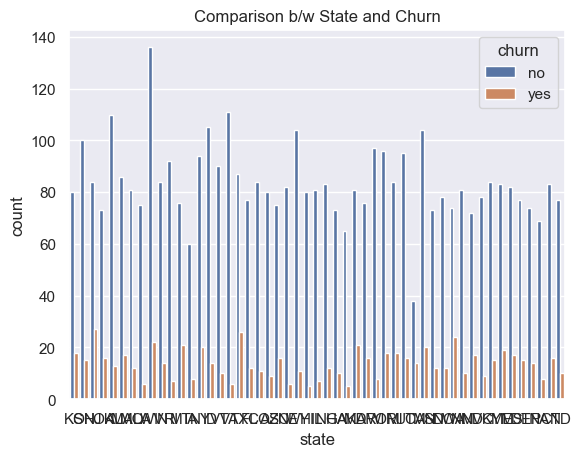

<Figure size 1200x600 with 0 Axes>

In [36]:
sns.set(style="darkgrid")
sns.countplot(x='state',hue='churn',data=data)
plt.title('Comparison b/w State and Churn')
plt.figure(figsize=(12,6))
plt.show()

### Top 5 States with most Churn Percentage

In [37]:
# Create a copy of the DataFrame
df = data.copy()

In [38]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['churn']= label_encoder.fit_transform(df['churn']) 
df['voice.plan']=label_encoder.fit_transform(df['voice.plan']) 
df['intl.plan']=label_encoder.fit_transform(df['intl.plan']) 

In [39]:
df1 = df['state'].unique()
df2 = df.groupby(['state'])['churn'].mean()*100

In [40]:
top_5 = df2.sort_values(ascending=False).head(5)

<Axes: xlabel='state'>

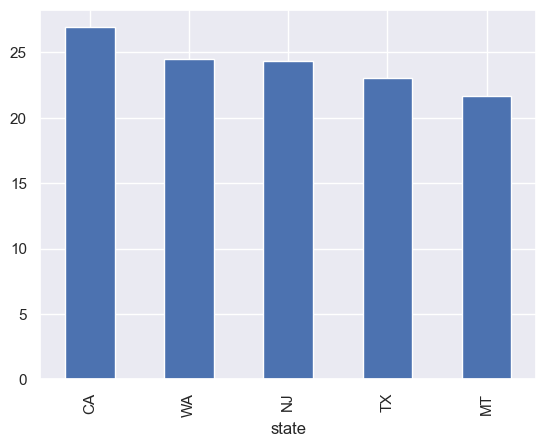

In [41]:
top_5.plot(kind='bar')

# State vs Churn Percentage

In [42]:
state_churn = pd.crosstab(data["state"],data["churn"])
state_churn['Percentage _Churn'] = state_churn.apply(lambda x : x[1]*100/(x[0]+x[1]), axis=1)
state_churn

churn,no,yes,Percentage _Churn
state,,,
AK,65,5,7.142857
AL,110,13,10.569106
AR,76,16,17.391304
AZ,80,9,10.112360
CA,38,14,26.923077
CO,84,11,11.578947
CT,83,16,16.161616
DC,78,9,10.344828
DE,77,15,16.304348


- There are 51 States having different Churn Rate
- From the analysis we came to know that CA,WA,NJ,TX,MT
- The reason for this churn rate is due to low coverage of Network

# Comparison between Area Code and Churn

In [43]:
Area_Churn = pd.crosstab(data["area.code"],data["churn"])
Area_Churn['Percentage_Churn'] = Area_Churn.apply (lambda x: x[1]*100/(x[0]+x[1]), axis=1)
Area_Churn

churn,no,yes,Percentage_Churn
area.code,,,
408,1072,177,14.171337
415,2135,344,13.876563
510,1057,184,14.826753


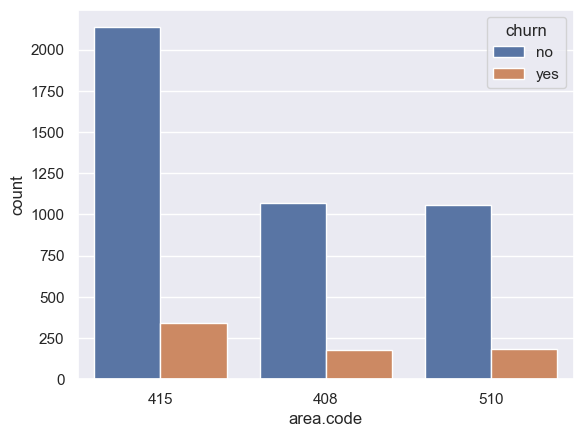

In [44]:
sns.set(style = "darkgrid")
sns.countplot(x="area.code", hue="churn", data=data)
plt.show()

- From the above data we can say that, there are 3 unique Areacodes which have alomost same Churn rate. So we can assume that there is no relation between Areacode and Churn rate.

# Analysing "Account Length" 

In [45]:
# Seperating Churn and non-churn Customer
churn_df = df[df["churn"] == bool(True)]
non_churn_df = df[df["churn"] == bool(False)]

In [46]:
churn_df

,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
10,IN,415,65,0,0,0,12.7,6,3.43,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,4,1
15,NY,415,161,0,0,0,5.4,9,1.46,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,4,1
21,CO,408,77,0,0,0,5.7,6,1.54,62.4,89,10.61,169.9,121,14.44,209.6,64,9.43,5,1
33,AZ,408,12,0,0,0,11.8,3,3.19,249.6,118,42.43,252.4,119,21.45,280.2,90,12.61,1,1
41,MD,408,135,1,41,1,14.6,15,3.94,173.1,85,29.43,203.9,107,17.33,122.2,78,5.50,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4959,NM,408,137,0,0,1,10.6,2,2.86,312.4,110,53.11,231.1,73,19.64,120.1,78,5.40,1,1
4980,WA,408,73,0,0,0,12.3,2,3.32,177.2,118,30.12,270.5,84,22.99,241.8,112,10.88,3,1
4990,ND,510,140,0,0,0,7.5,6,2.03,244.7,115,41.60,258.6,101,21.98,231.3,112,10.41,1,1
4991,AZ,510,97,0,0,0,8.8,5,2.38,252.6,89,42.94,340.3,91,28.93,256.5,67,11.54,1,1


In [47]:
non_churn_df

,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
0,KS,415,128,1,25,0,10.0,3,2.70,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,1,0
1,OH,415,107,1,26,0,13.7,3,3.70,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,1,0
2,NJ,415,137,0,0,0,12.2,5,3.29,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,0,0
3,OH,408,84,0,0,1,6.6,7,1.78,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,2,0
4,OK,415,75,0,0,1,10.1,3,2.73,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,NC,408,75,0,0,0,6.9,7,1.86,170.7,101,29.02,193.1,126,16.41,129.1,104,5.81,1,0
4995,HI,408,50,1,40,0,9.9,5,2.67,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,2,0
4997,DC,415,61,0,0,0,13.6,4,3.67,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,1,0
4998,DC,510,109,0,0,0,8.5,6,2.30,188.8,67,32.10,171.7,92,14.59,224.4,89,10.10,0,0


###  Account Length Vs Churn

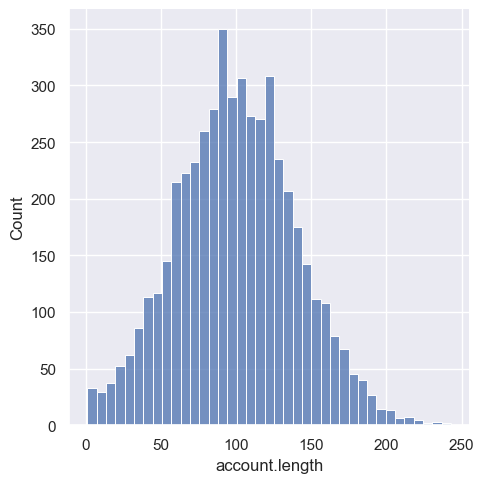

In [48]:
sns.displot(data['account.length'])

### Compariosn b/w Churned Account Length and Non-Churned Account Length

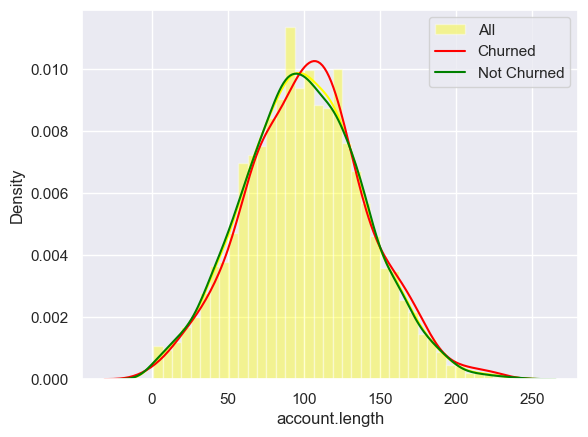

In [49]:
sns.distplot(df['account.length'],color = 'yellow', label="All")
sns.distplot(churn_df['account.length'],color = "red",hist=False, label="Churned")
sns.distplot(non_churn_df['account.length'],color = 'green',hist=False, label="Not Churned")
plt.legend()
plt.show()

# Comparison between International Plan and Churn

In [50]:
intl_Churn = pd.crosstab(data["intl.plan"],data["churn"])
intl_Churn['Percentage_Churn'] = intl_Churn.apply (lambda x: x[1]*100/(x[0]+x[1]), axis=1)
intl_Churn

churn,no,yes,Percentage_Churn
intl.plan,,,
no,3993,506,11.246944
yes,271,199,42.340426


### Analysing International Plan with the Donut Chart

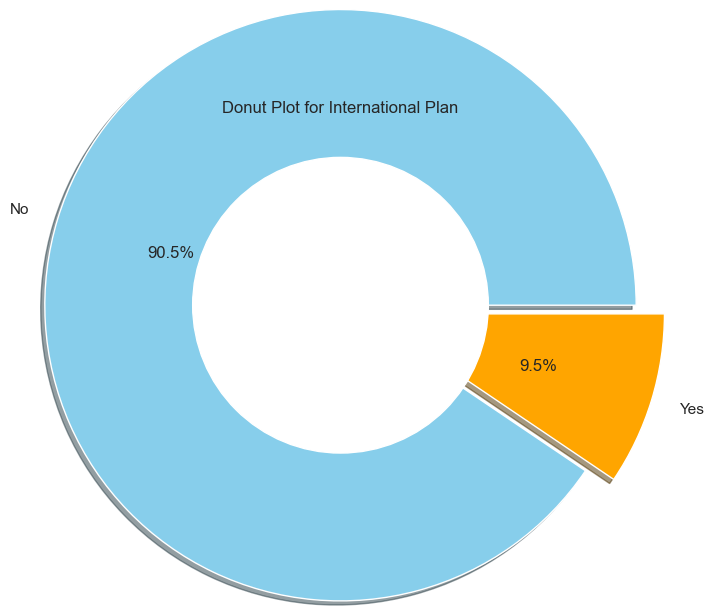

In [51]:
dff = df['intl.plan'].value_counts()
explode = (0,0.2)
plt.pie(dff, explode = explode, autopct='%1.1f%%', shadow=True,radius=2.0, labels = ['No','Yes'],colors=['skyblue','orange'])
circle = plt.Circle( (0,0),1,color='white')
p=plt.gcf()
p.gca().add_artist(circle)
plt.title("Donut Plot for International Plan")
plt.show()

<Axes: xlabel='intl.plan', ylabel='count'>

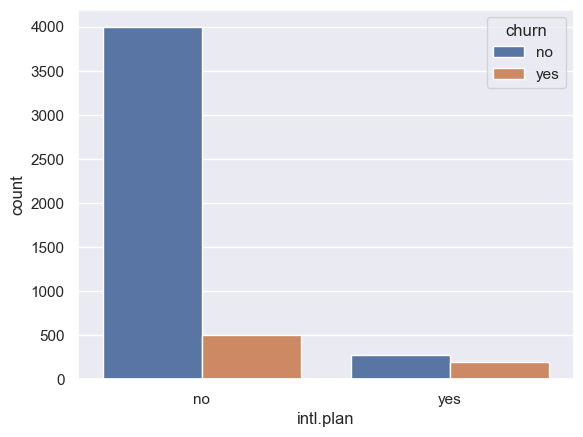

In [52]:
##Analysing using Countplot
sns.countplot(x='intl.plan', hue='churn', data=data)

- From the above we can say that, there are 4499 customers who don't have international plan
- 470 customers don't have international plan
- 42.34% customers have international plan
- 11.24% customers don't have international plan

# Comparison between Voiceplan and Churn 

In [53]:
voice_churn = pd.crosstab(data["voice.plan"],data["churn"])
voice_churn['Percentage_Churn'] = voice_churn.apply (lambda x: x[1]*100/(x[0]+x[1]), axis=1)
voice_churn

churn,no,yes,Percentage_Churn
voice.plan,,,
no,3050,604,16.529830
yes,1214,101,7.680608


### Analysing Voice Plan with the Donut Chart

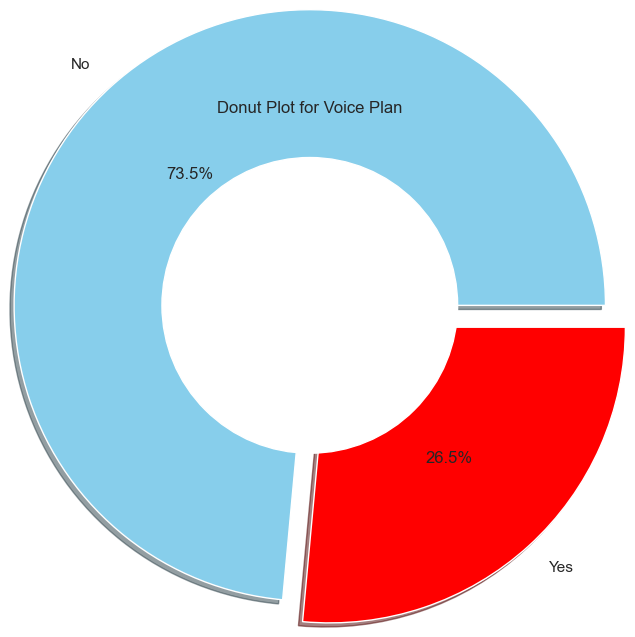

In [54]:
dff = df['voice.plan'].value_counts()
explode = (0,0.2)
plt.pie(dff, explode = explode, autopct='%1.1f%%', shadow=True,radius=2.0, labels = ['No','Yes'],colors=['skyblue','red'])
circle = plt.Circle( (0,0),1,color='white')
p=plt.gcf()
p.gca().add_artist(circle)
plt.title("Donut Plot for Voice Plan")
plt.show()

<Axes: xlabel='voice.plan', ylabel='count'>

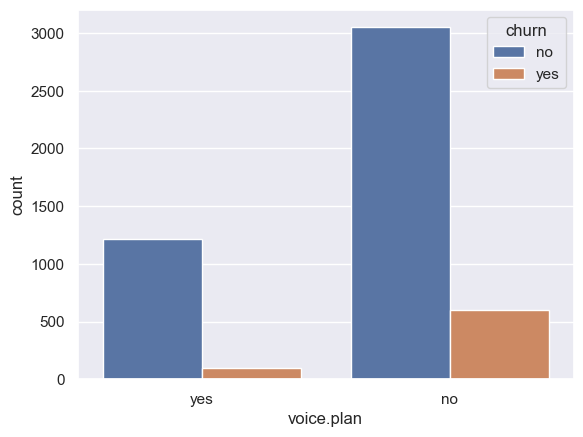

In [55]:
##Analysing using Countplot
sns.countplot(x='voice.plan', hue='churn', data=data)

- From above we can say that, there is no clear relation between Voice plan and Churn

# Analysing Voice Messages

In [56]:
#Unique Values of Voice Messages
df['voice.messages'].unique()

array([25, 26,  0, 24, 37, 27, 33, 39, 30, 41, 28, 34, 46, 29, 35, 21, 32,
       42, 36, 22, 23, 43, 31, 38, 40, 48, 18, 17, 45, 16, 20, 14, 19, 51,
       15, 11, 12, 47,  8, 44, 49,  4, 10, 13, 50,  9,  6, 52],
      dtype=int64)

In [57]:
#Unique Counts of Voice Messages
print(df['voice.messages'].value_counts())

0     3655
31      83
28      67
29      67
33      66
24      63
27      63
30      58
26      57
32      56
23      52
25      51
22      47
36      44
37      43
34      41
39      41
35      41
21      41
38      40
20      31
40      28
19      27
41      22
17      21
42      19
18      18
16      17
43      16
15      13
45      11
12      11
14       9
44       9
46       8
48       5
13       4
47       4
10       4
49       3
6        2
9        2
50       2
11       2
8        2
4        1
51       1
52       1
Name: voice.messages, dtype: int64


In [58]:
df['voice.messages'].describe()

count    4969.000000
mean        7.754880
std        13.545738
min         0.000000
25%         0.000000
50%         0.000000
75%        17.000000
max        52.000000
Name: voice.messages, dtype: float64

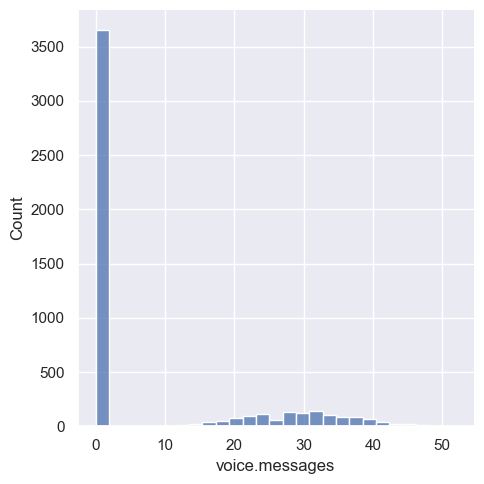

In [59]:
#Analysing using distplot 
sns.displot(df['voice.messages'])

### Comparison between Voice Messages and Churn by using Boxplot

<Figure size 1000x800 with 0 Axes>

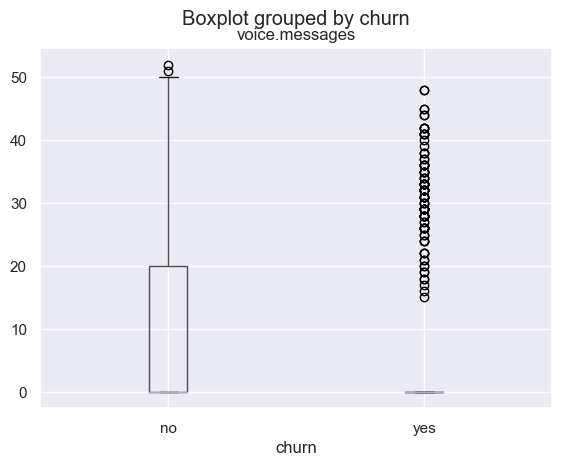

In [60]:
fig = plt.figure(figsize=(10,8))
data.boxplot(column='voice.messages', by='churn')
fig.suptitle('Voice Messages Vs Churn')
plt.show()

# Analysing Customer Calls

In [61]:
#Unique Values of Customer Calls
df['customer.calls'].unique()

array([1, 0, 2, 3, 4, 5, 7, 9, 6, 8], dtype=int64)

In [62]:
#Unique Counts of Customer Calls
print(df['customer.calls'].value_counts())

1    1772
2    1123
0    1016
3     660
4     251
5      96
6      34
7      13
9       2
8       2
Name: customer.calls, dtype: int64


In [63]:
#Customer calls vs Churn
customer_churn = pd.crosstab(data["customer.calls"],data["churn"])
customer_churn['Percentage_Churn'] = customer_churn.apply (lambda x: x[1]*100/(x[0]+x[1]), axis=1)
customer_churn

churn,no,yes,Percentage_Churn
customer.calls,,,
0,895,121,11.909449
1,1584,188,10.609481
2,1001,122,10.863758
3,587,73,11.060606
4,140,111,44.223108
5,38,58,60.416667
6,12,22,64.705882
7,6,7,53.846154
8,1,1,50.000000


#Analysing using Countplot
sns.countplot(x='customer.calls', hue='churn', data=data)

# Combining the remaining columns

In [64]:
df['total_charge'] = df['intl.charge'] + df['day.charge'] + df['eve.charge'] + df['night.charge']
df['total_calls'] = df['intl.calls'] + df['day.calls'] + df['eve.calls'] + df['night.charge']
df['total_mins'] = df['intl.mins'] + df['day.mins'] + df['eve.mins'] + df['night.mins']

columns = ['total_charge', 'total_calls','total_mins','churn']
data_subset = df[columns]


# Compute the correlation matrix
correlation_matrix = data_subset.corr(method='pearson', min_periods=1)

# Display the correlation matrix
print(correlation_matrix)

              total_charge  total_calls  total_mins     churn
total_charge      1.000000     0.023050    0.889551  0.235562
total_calls       0.023050     1.000000    0.049679  0.006992
total_mins        0.889551     0.049679    1.000000  0.204255
churn             0.235562     0.006992    0.204255  1.000000


In [65]:
df['total_charge'] = (df['intl.charge']+ df['day.charge'] + df['eve.charge']+ df['night.charge']).astype(int)
df['total_calls'] = (df['intl.calls'] + df['day.calls'] + df['eve.calls'] + df['night.charge']).astype(int)
df['total_mins'] = (df['intl.mins'] + df['day.mins'] + df['eve.mins'] + df['night.mins']).astype(int)

# Analysing Total Charge

In [66]:
# Seperating Churn and non-churn Customer
total_churn = df[df["churn"] == bool(True)]
total_non_churn = df[df["churn"] == bool(False)]

In [67]:
total_churn

,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn,total_charge,total_calls,total_mins
10,IN,415,65,0,0,0,12.7,6,3.43,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,4,1,54,235,579
15,NY,415,161,0,0,0,5.4,9,1.46,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,4,1,92,180,816
21,CO,408,77,0,0,0,5.7,6,1.54,62.4,89,10.61,169.9,121,14.44,209.6,64,9.43,5,1,36,225,447
33,AZ,408,12,0,0,0,11.8,3,3.19,249.6,118,42.43,252.4,119,21.45,280.2,90,12.61,1,1,79,252,794
41,MD,408,135,1,41,1,14.6,15,3.94,173.1,85,29.43,203.9,107,17.33,122.2,78,5.50,0,1,56,212,513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4959,NM,408,137,0,0,1,10.6,2,2.86,312.4,110,53.11,231.1,73,19.64,120.1,78,5.40,1,1,81,190,674
4980,WA,408,73,0,0,0,12.3,2,3.32,177.2,118,30.12,270.5,84,22.99,241.8,112,10.88,3,1,67,214,701
4990,ND,510,140,0,0,0,7.5,6,2.03,244.7,115,41.60,258.6,101,21.98,231.3,112,10.41,1,1,76,232,742
4991,AZ,510,97,0,0,0,8.8,5,2.38,252.6,89,42.94,340.3,91,28.93,256.5,67,11.54,1,1,85,196,858


In [68]:
total_non_churn

,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn,total_charge,total_calls,total_mins
0,KS,415,128,1,25,0,10.0,3,2.70,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,1,0,75,223,717
1,OH,415,107,1,26,0,13.7,3,3.70,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,1,0,59,240,625
2,NJ,415,137,0,0,0,12.2,5,3.29,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,0,0,62,236,539
3,OH,408,84,0,0,1,6.6,7,1.78,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,2,0,66,174,564
4,OK,415,75,0,0,1,10.1,3,2.73,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,3,0,52,246,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,NC,408,75,0,0,0,6.9,7,1.86,170.7,101,29.02,193.1,126,16.41,129.1,104,5.81,1,0,53,239,499
4995,HI,408,50,1,40,0,9.9,5,2.67,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,2,0,75,271,766
4997,DC,415,61,0,0,0,13.6,4,3.67,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,1,0,51,230,539
4998,DC,510,109,0,0,0,8.5,6,2.30,188.8,67,32.10,171.7,92,14.59,224.4,89,10.10,0,0,59,175,593


### Plotting Total Charge

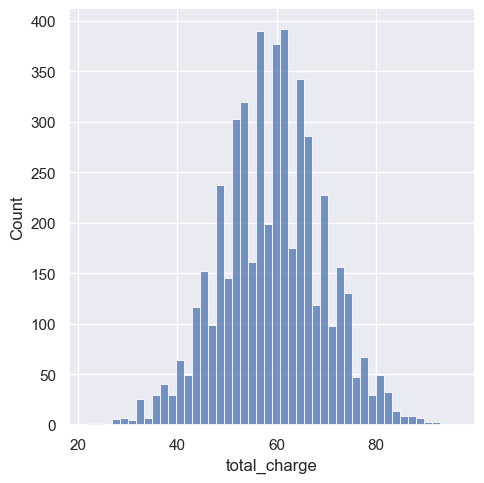

In [69]:
sns.displot(df['total_charge'])

### Comparison b/w Churned Total Charge and Total Non-Churned Charge

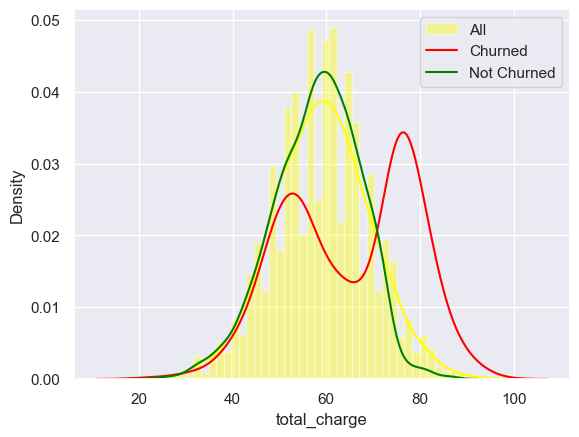

In [70]:
sns.distplot(df['total_charge'],color = 'yellow', label="All")
sns.distplot(total_churn['total_charge'],color = "red",hist=False, label="Churned")
sns.distplot(total_non_churn['total_charge'],color = 'green',hist=False, label="Not Churned")
plt.legend()
plt.show()

# Analysing Total Calls

In [71]:
# Seperating Churn and non-churn Customer
call_churn = df[df["churn"] == bool(True)]
call_non_churn = df[df["churn"] == bool(False)]

In [72]:
call_churn

,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn,total_charge,total_calls,total_mins
10,IN,415,65,0,0,0,12.7,6,3.43,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,4,1,54,235,579
15,NY,415,161,0,0,0,5.4,9,1.46,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,4,1,92,180,816
21,CO,408,77,0,0,0,5.7,6,1.54,62.4,89,10.61,169.9,121,14.44,209.6,64,9.43,5,1,36,225,447
33,AZ,408,12,0,0,0,11.8,3,3.19,249.6,118,42.43,252.4,119,21.45,280.2,90,12.61,1,1,79,252,794
41,MD,408,135,1,41,1,14.6,15,3.94,173.1,85,29.43,203.9,107,17.33,122.2,78,5.50,0,1,56,212,513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4959,NM,408,137,0,0,1,10.6,2,2.86,312.4,110,53.11,231.1,73,19.64,120.1,78,5.40,1,1,81,190,674
4980,WA,408,73,0,0,0,12.3,2,3.32,177.2,118,30.12,270.5,84,22.99,241.8,112,10.88,3,1,67,214,701
4990,ND,510,140,0,0,0,7.5,6,2.03,244.7,115,41.60,258.6,101,21.98,231.3,112,10.41,1,1,76,232,742
4991,AZ,510,97,0,0,0,8.8,5,2.38,252.6,89,42.94,340.3,91,28.93,256.5,67,11.54,1,1,85,196,858


In [73]:
call_non_churn

,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn,total_charge,total_calls,total_mins
0,KS,415,128,1,25,0,10.0,3,2.70,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,1,0,75,223,717
1,OH,415,107,1,26,0,13.7,3,3.70,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,1,0,59,240,625
2,NJ,415,137,0,0,0,12.2,5,3.29,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,0,0,62,236,539
3,OH,408,84,0,0,1,6.6,7,1.78,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,2,0,66,174,564
4,OK,415,75,0,0,1,10.1,3,2.73,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,3,0,52,246,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,NC,408,75,0,0,0,6.9,7,1.86,170.7,101,29.02,193.1,126,16.41,129.1,104,5.81,1,0,53,239,499
4995,HI,408,50,1,40,0,9.9,5,2.67,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,2,0,75,271,766
4997,DC,415,61,0,0,0,13.6,4,3.67,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,1,0,51,230,539
4998,DC,510,109,0,0,0,8.5,6,2.30,188.8,67,32.10,171.7,92,14.59,224.4,89,10.10,0,0,59,175,593


### Plotting Total Call 

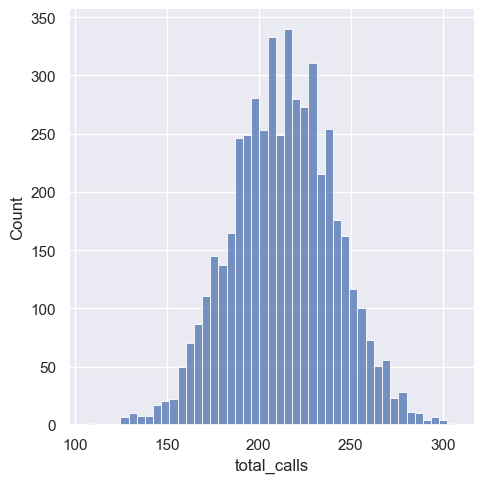

In [74]:
sns.displot(df['total_calls'])

### Comparison b/w Total Churned Calls and Total Non-Churned Calls

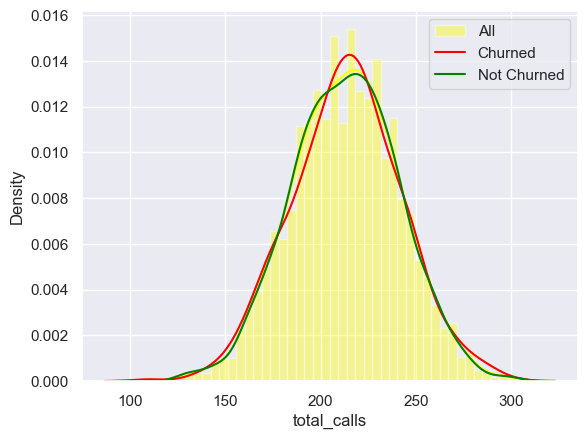

In [75]:
sns.distplot(df['total_calls'],color = 'yellow', label="All")
sns.distplot(total_churn['total_calls'],color = "red",hist=False, label="Churned")
sns.distplot(total_non_churn['total_calls'],color = 'green',hist=False, label="Not Churned")
plt.legend()
plt.show()

# Analysing Total Minutes

In [76]:
# Seperating Churn and non-churn Customer
mins_churn = df[df["churn"] == bool(True)]
mins_non_churn = df[df["churn"] == bool(False)]

In [77]:
mins_churn

,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn,total_charge,total_calls,total_mins
10,IN,415,65,0,0,0,12.7,6,3.43,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,4,1,54,235,579
15,NY,415,161,0,0,0,5.4,9,1.46,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,4,1,92,180,816
21,CO,408,77,0,0,0,5.7,6,1.54,62.4,89,10.61,169.9,121,14.44,209.6,64,9.43,5,1,36,225,447
33,AZ,408,12,0,0,0,11.8,3,3.19,249.6,118,42.43,252.4,119,21.45,280.2,90,12.61,1,1,79,252,794
41,MD,408,135,1,41,1,14.6,15,3.94,173.1,85,29.43,203.9,107,17.33,122.2,78,5.50,0,1,56,212,513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4959,NM,408,137,0,0,1,10.6,2,2.86,312.4,110,53.11,231.1,73,19.64,120.1,78,5.40,1,1,81,190,674
4980,WA,408,73,0,0,0,12.3,2,3.32,177.2,118,30.12,270.5,84,22.99,241.8,112,10.88,3,1,67,214,701
4990,ND,510,140,0,0,0,7.5,6,2.03,244.7,115,41.60,258.6,101,21.98,231.3,112,10.41,1,1,76,232,742
4991,AZ,510,97,0,0,0,8.8,5,2.38,252.6,89,42.94,340.3,91,28.93,256.5,67,11.54,1,1,85,196,858


In [78]:
mins_non_churn

,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn,total_charge,total_calls,total_mins
0,KS,415,128,1,25,0,10.0,3,2.70,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,1,0,75,223,717
1,OH,415,107,1,26,0,13.7,3,3.70,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,1,0,59,240,625
2,NJ,415,137,0,0,0,12.2,5,3.29,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,0,0,62,236,539
3,OH,408,84,0,0,1,6.6,7,1.78,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,2,0,66,174,564
4,OK,415,75,0,0,1,10.1,3,2.73,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,3,0,52,246,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,NC,408,75,0,0,0,6.9,7,1.86,170.7,101,29.02,193.1,126,16.41,129.1,104,5.81,1,0,53,239,499
4995,HI,408,50,1,40,0,9.9,5,2.67,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,2,0,75,271,766
4997,DC,415,61,0,0,0,13.6,4,3.67,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,1,0,51,230,539
4998,DC,510,109,0,0,0,8.5,6,2.30,188.8,67,32.10,171.7,92,14.59,224.4,89,10.10,0,0,59,175,593


### Plotting Total Minutes

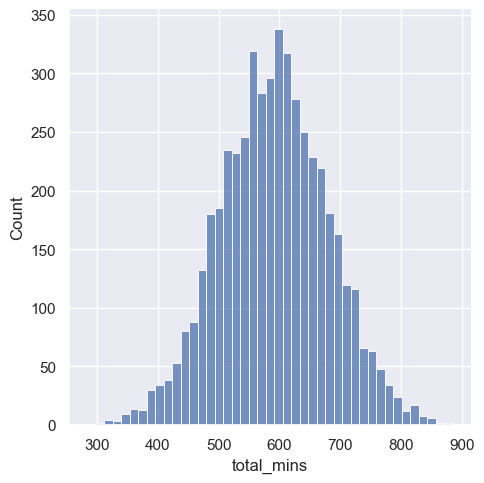

In [79]:
sns.displot(df['total_mins'])

### Compariosn b/w Total Churned Minutes and Total Non-Churned Minutes

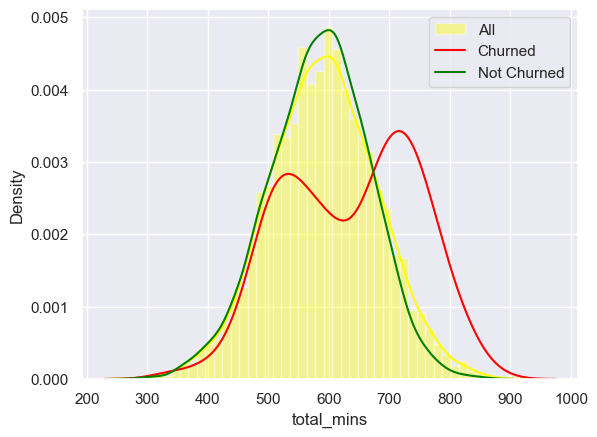

In [80]:
sns.distplot(df['total_mins'],color = 'yellow', label="All")
sns.distplot(total_churn['total_mins'],color = "red",hist=False, label="Churned")
sns.distplot(total_non_churn['total_mins'],color = 'green',hist=False, label="Not Churned")
plt.legend()
plt.show()

# Standardisation of Data

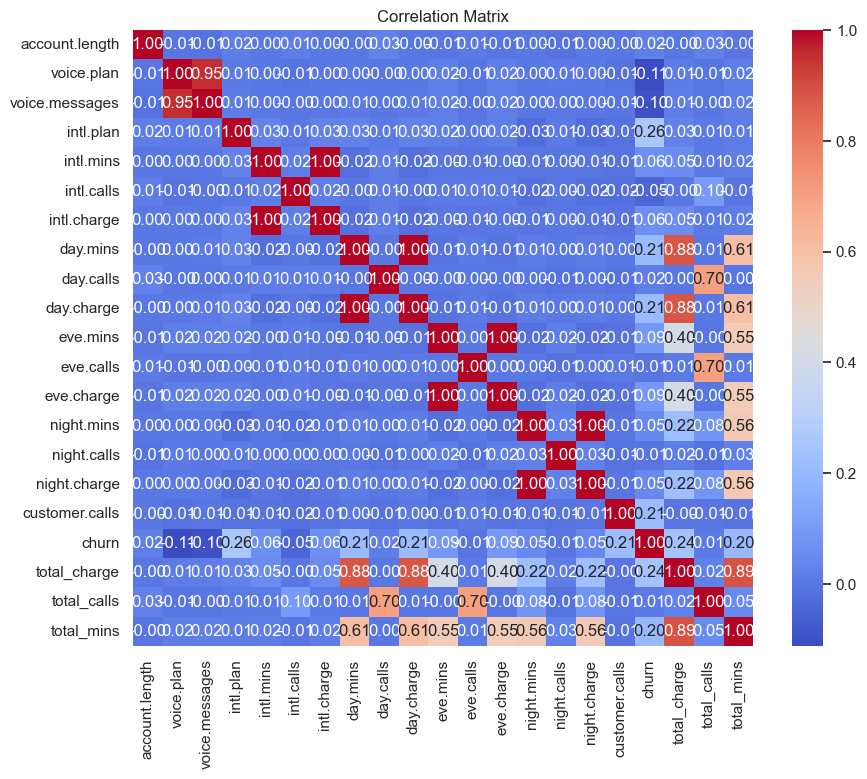

account.length    0.021307
voice.plan       -0.111879
voice.messages   -0.098588
intl.plan         0.260779
intl.mins         0.062034
intl.calls       -0.046513
intl.charge       0.062028
day.mins          0.207961
day.calls         0.016067
day.charge        0.207956
eve.mins          0.089104
eve.calls        -0.005534
eve.charge        0.089097
night.mins        0.045488
night.calls      -0.006732
night.charge      0.045484
customer.calls    0.213432
churn             1.000000
total_charge      0.235657
total_calls       0.006704
total_mins        0.204275
Name: churn, dtype: float64


In [81]:
# Calculate correlation matrix
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

print(correlation_matrix['churn'])

- Account Length: The "account.length" column has a very weak positive correlation (0.02) with churn. This suggests that there is little to no linear relationship between the length of the account and the likelihood of churn.
- Voice Plan: The "voice.plan" column has a moderately negative correlation (-0.11) with churn. This indicates that customers with a voice plan are slightly less likely to churn compared to those without a voice plan.
- Voice Messages: The "voice.messages" column has a moderately negative correlation (-0.10) with churn. This implies that a higher number of voicemail messages is associated with a slightly lower likelihood of churn.
- International Plan: The "intl.plan" column has a moderate positive correlation (0.26) with churn. This suggests that customers with an international plan are more likely to churn compared to those without an international plan.
- Customer Calls: The "customer.calls" column has a moderate positive correlation (0.21) with churn. This indicates that a higher number of calls to customer service is associated with a higher likelihood of churn.
- Other Columns: The remaining columns (e.g., "intl.mins", "day.mins", "eve.mins", etc.) show weak correlations with churn, suggesting that they have little to no linear relationship with the likelihood of churn.
- We see strong coorelation between some columns, such as 'Day Charge' and 'Day Minutes'. So one of them can be removed during feature selection to avoid multi-collinearity issues.

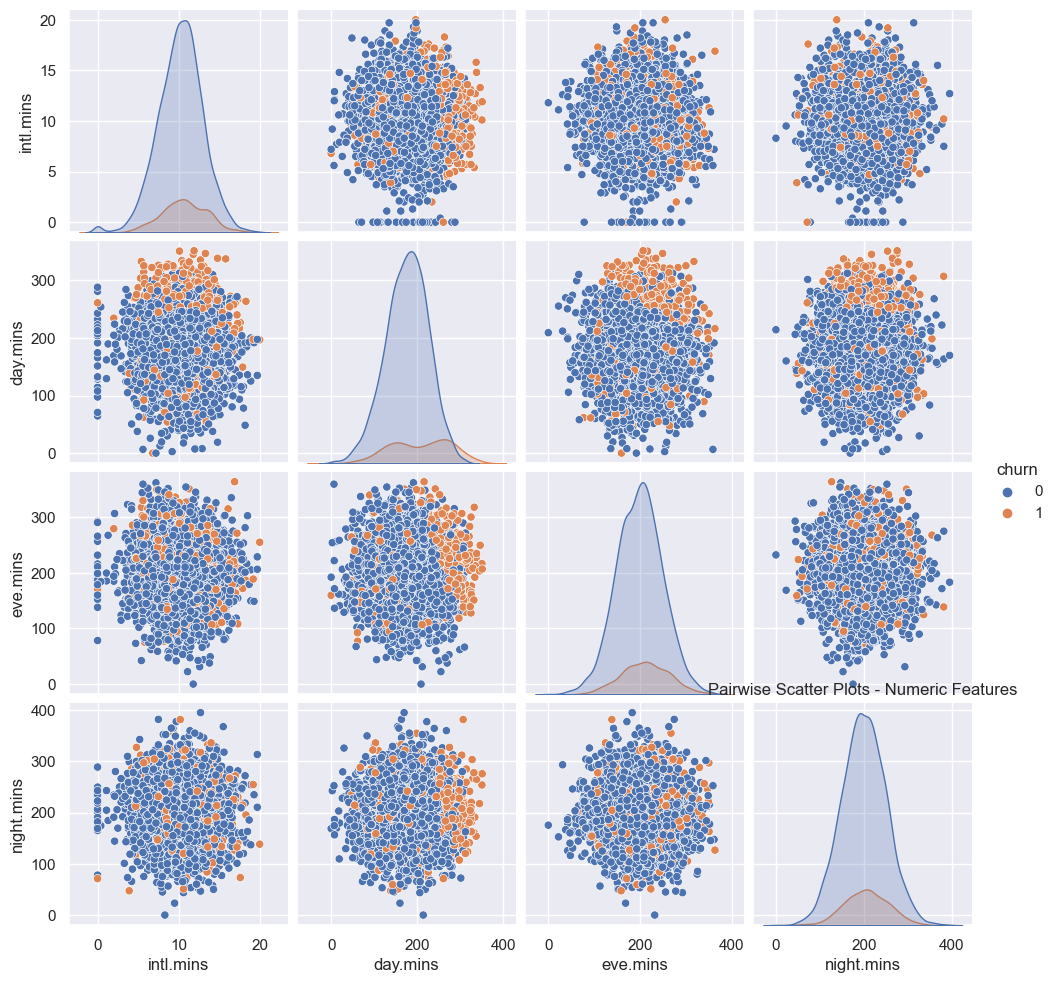

In [82]:
# Pairwise Scatter Plots
numeric_features = ["intl.mins", "day.mins", "eve.mins", "night.mins"]
sns.pairplot(data=df, vars=numeric_features, hue="churn")
plt.title("Pairwise Scatter Plots - Numeric Features")
plt.show()

In [83]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [84]:
corr_features = correlation(df, 0.85)
len(set(corr_features))

7

In [85]:
corr_features

{'day.charge',
 'eve.charge',
 'intl.charge',
 'night.charge',
 'total_charge',
 'total_mins',
 'voice.messages'}

In [86]:
df.head(5)

,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn,total_charge,total_calls,total_mins
0,KS,415,128,1,25,0,10.0,3,2.70,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,1,0,75,223,717
1,OH,415,107,1,26,0,13.7,3,3.70,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,1,0,59,240,625
2,NJ,415,137,0,0,0,12.2,5,3.29,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,0,0,62,236,539
3,OH,408,84,0,0,1,6.6,7,1.78,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,2,0,66,174,564
4,OK,415,75,0,0,1,10.1,3,2.73,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,3,0,52,246,512


In [87]:
df = df.drop(corr_features,axis=1)
df

,state,area.code,account.length,voice.plan,intl.plan,intl.mins,intl.calls,day.mins,day.calls,eve.mins,eve.calls,night.mins,night.calls,customer.calls,churn,total_calls
0,KS,415,128,1,0,10.0,3,265.1,110,197.4,99,244.7,91,1,0,223
1,OH,415,107,1,0,13.7,3,161.6,123,195.5,103,254.4,103,1,0,240
2,NJ,415,137,0,0,12.2,5,243.4,114,121.2,110,162.6,104,0,0,236
3,OH,408,84,0,1,6.6,7,299.4,71,61.9,88,196.9,89,2,0,174
4,OK,415,75,0,1,10.1,3,166.7,113,148.3,122,186.9,121,3,0,246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,HI,408,50,1,0,9.9,5,235.7,127,223.0,126,297.5,116,2,0,271
4996,WV,415,152,0,0,14.7,2,184.2,90,256.8,73,213.6,113,3,1,174
4997,DC,415,61,0,0,13.6,4,140.6,89,172.8,128,212.4,97,1,0,230
4998,DC,510,109,0,0,8.5,6,188.8,67,171.7,92,224.4,89,0,0,175


In [88]:
## From Area Code Analysis we can conclude that there is no significant relation between 'area code' and 'churn' in the given dataset.
# so we will drop 'area.code' column also
df = df.drop('area.code', axis=1)

In [89]:
df.head(10)

,state,account.length,voice.plan,intl.plan,intl.mins,intl.calls,day.mins,day.calls,eve.mins,eve.calls,night.mins,night.calls,customer.calls,churn,total_calls
0,KS,128,1,0,10.0,3,265.1,110,197.4,99,244.7,91,1,0,223
1,OH,107,1,0,13.7,3,161.6,123,195.5,103,254.4,103,1,0,240
2,NJ,137,0,0,12.2,5,243.4,114,121.2,110,162.6,104,0,0,236
3,OH,84,0,1,6.6,7,299.4,71,61.9,88,196.9,89,2,0,174
4,OK,75,0,1,10.1,3,166.7,113,148.3,122,186.9,121,3,0,246
5,AL,118,0,1,6.3,6,223.4,98,220.6,101,203.9,118,0,0,214
6,MA,121,1,0,7.5,7,218.2,88,348.5,108,212.6,118,3,0,212
7,MO,147,0,1,7.1,6,157.0,79,103.1,94,211.8,96,0,0,188
8,LA,117,0,0,8.7,4,184.5,97,351.6,80,215.8,90,1,0,190
9,WV,141,1,1,11.2,5,258.6,84,222.0,111,326.4,97,0,0,214


In [90]:
df = df.drop('state', axis=1)

In [91]:
df.head(5)

,account.length,voice.plan,intl.plan,intl.mins,intl.calls,day.mins,day.calls,eve.mins,eve.calls,night.mins,night.calls,customer.calls,churn,total_calls
0,128,1,0,10.0,3,265.1,110,197.4,99,244.7,91,1,0,223
1,107,1,0,13.7,3,161.6,123,195.5,103,254.4,103,1,0,240
2,137,0,0,12.2,5,243.4,114,121.2,110,162.6,104,0,0,236
3,84,0,1,6.6,7,299.4,71,61.9,88,196.9,89,2,0,174
4,75,0,1,10.1,3,166.7,113,148.3,122,186.9,121,3,0,246


In [92]:
#Updating values _after removal of var
cname = ['account.length', 'intl.mins', 'intl.calls', 'day.mins', 'day.calls', 'eve.mins',
       'eve.calls', 'night.mins', 'night.calls', 'customer.calls',
       'total_calls']

#All categorical var and removing target var
cat_names = ['voice.plan', 'intl.plan']

print('cname :- {}'.format(cname))
print()
print('cat_name :- {}'.format(cat_names))

cname :- ['account.length', 'intl.mins', 'intl.calls', 'day.mins', 'day.calls', 'eve.mins', 'eve.calls', 'night.mins', 'night.calls', 'customer.calls', 'total_calls']

cat_name :- ['voice.plan', 'intl.plan']


In [93]:
df.head(5)

,account.length,voice.plan,intl.plan,intl.mins,intl.calls,day.mins,day.calls,eve.mins,eve.calls,night.mins,night.calls,customer.calls,churn,total_calls
0,128,1,0,10.0,3,265.1,110,197.4,99,244.7,91,1,0,223
1,107,1,0,13.7,3,161.6,123,195.5,103,254.4,103,1,0,240
2,137,0,0,12.2,5,243.4,114,121.2,110,162.6,104,0,0,236
3,84,0,1,6.6,7,299.4,71,61.9,88,196.9,89,2,0,174
4,75,0,1,10.1,3,166.7,113,148.3,122,186.9,121,3,0,246


# Feature Scaling

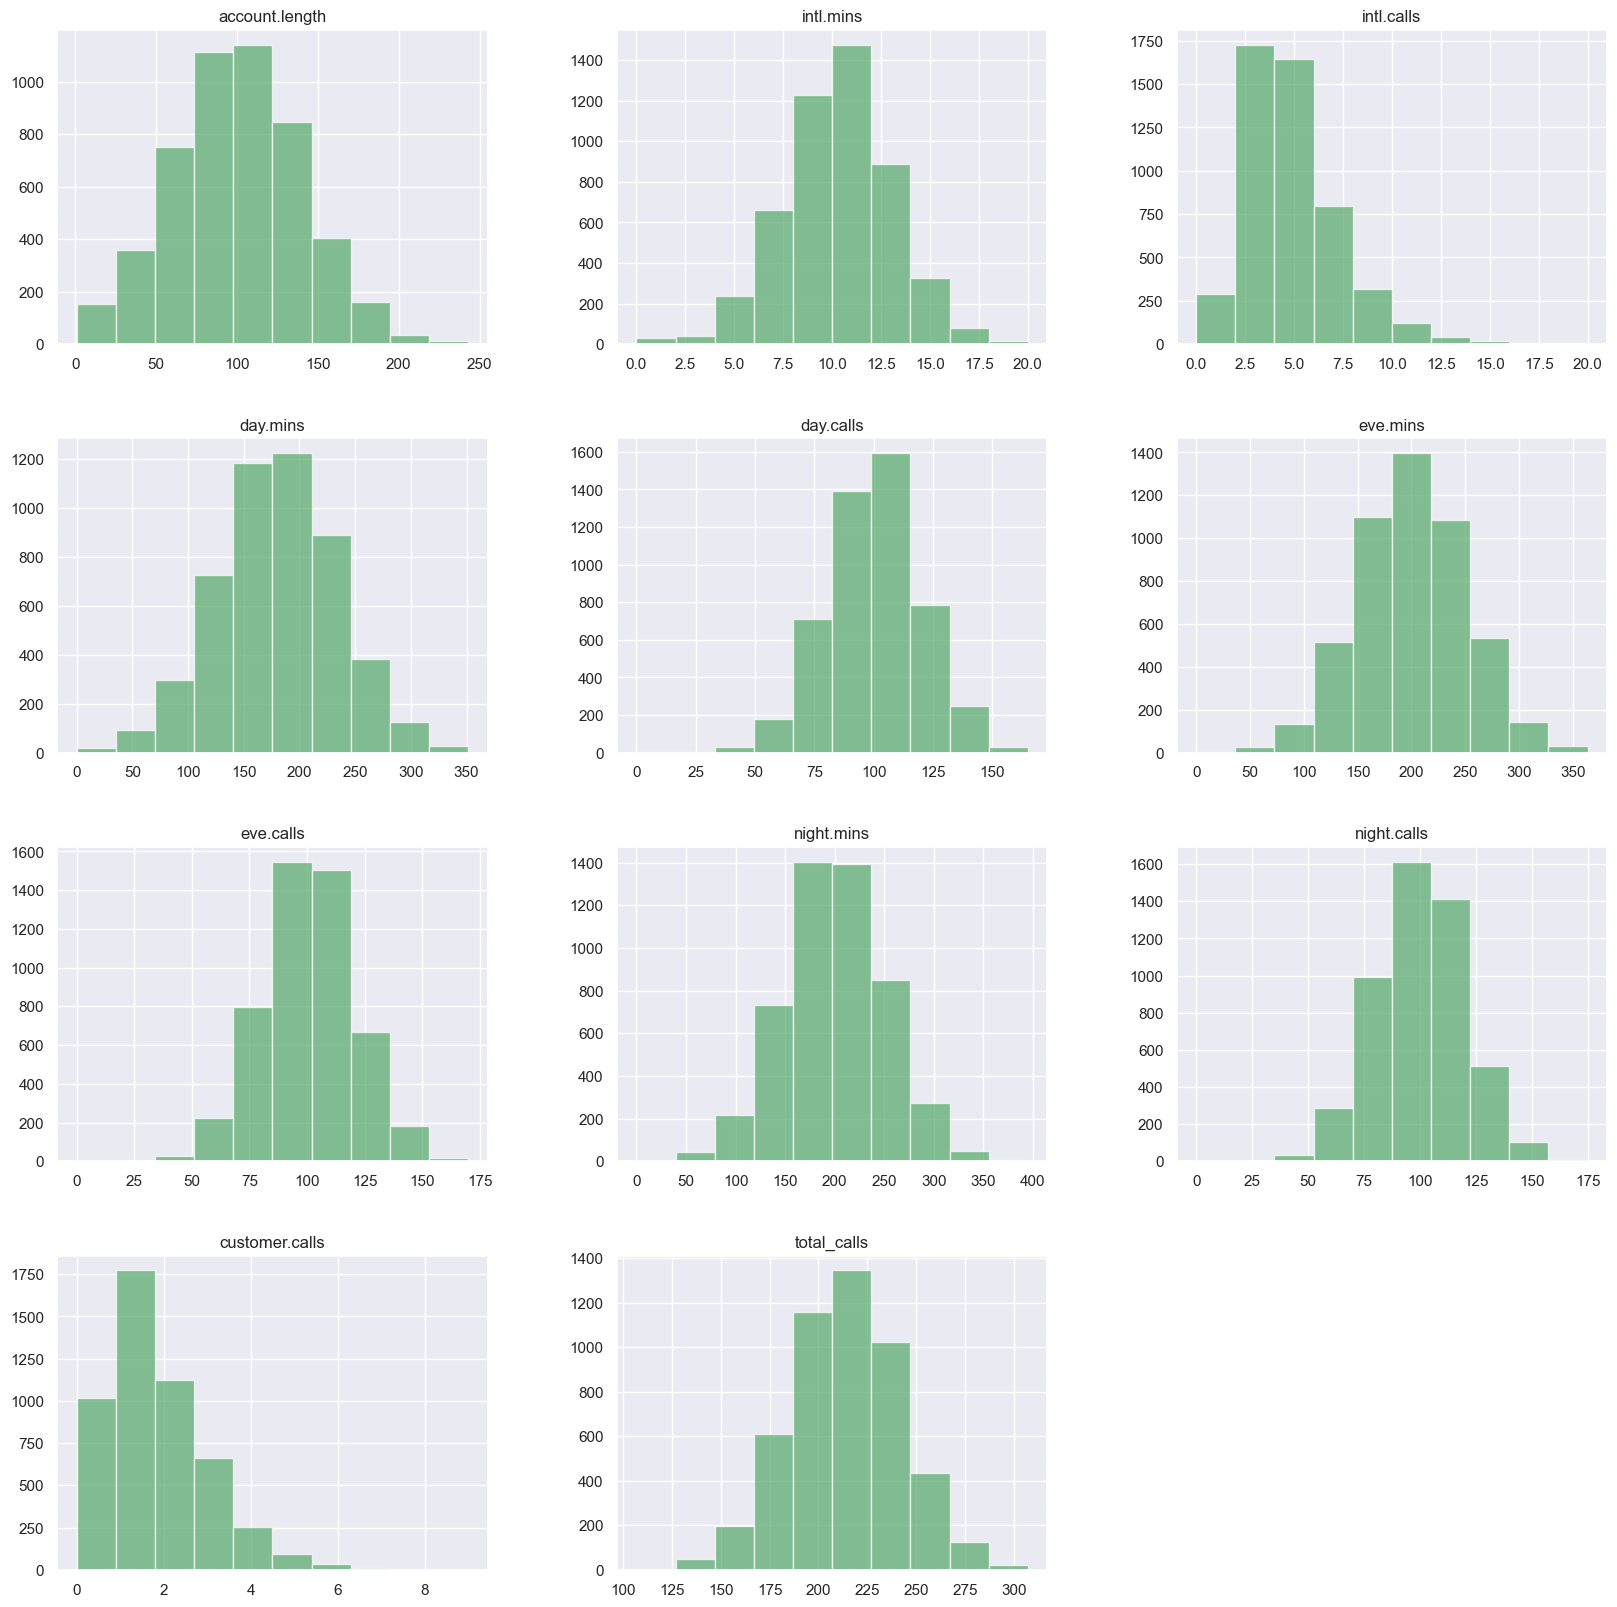

In [94]:
#Checking distribution of data via pandas visualization
df[cname].hist(figsize=(20,20),color='g',alpha = 0.7)
plt.show()

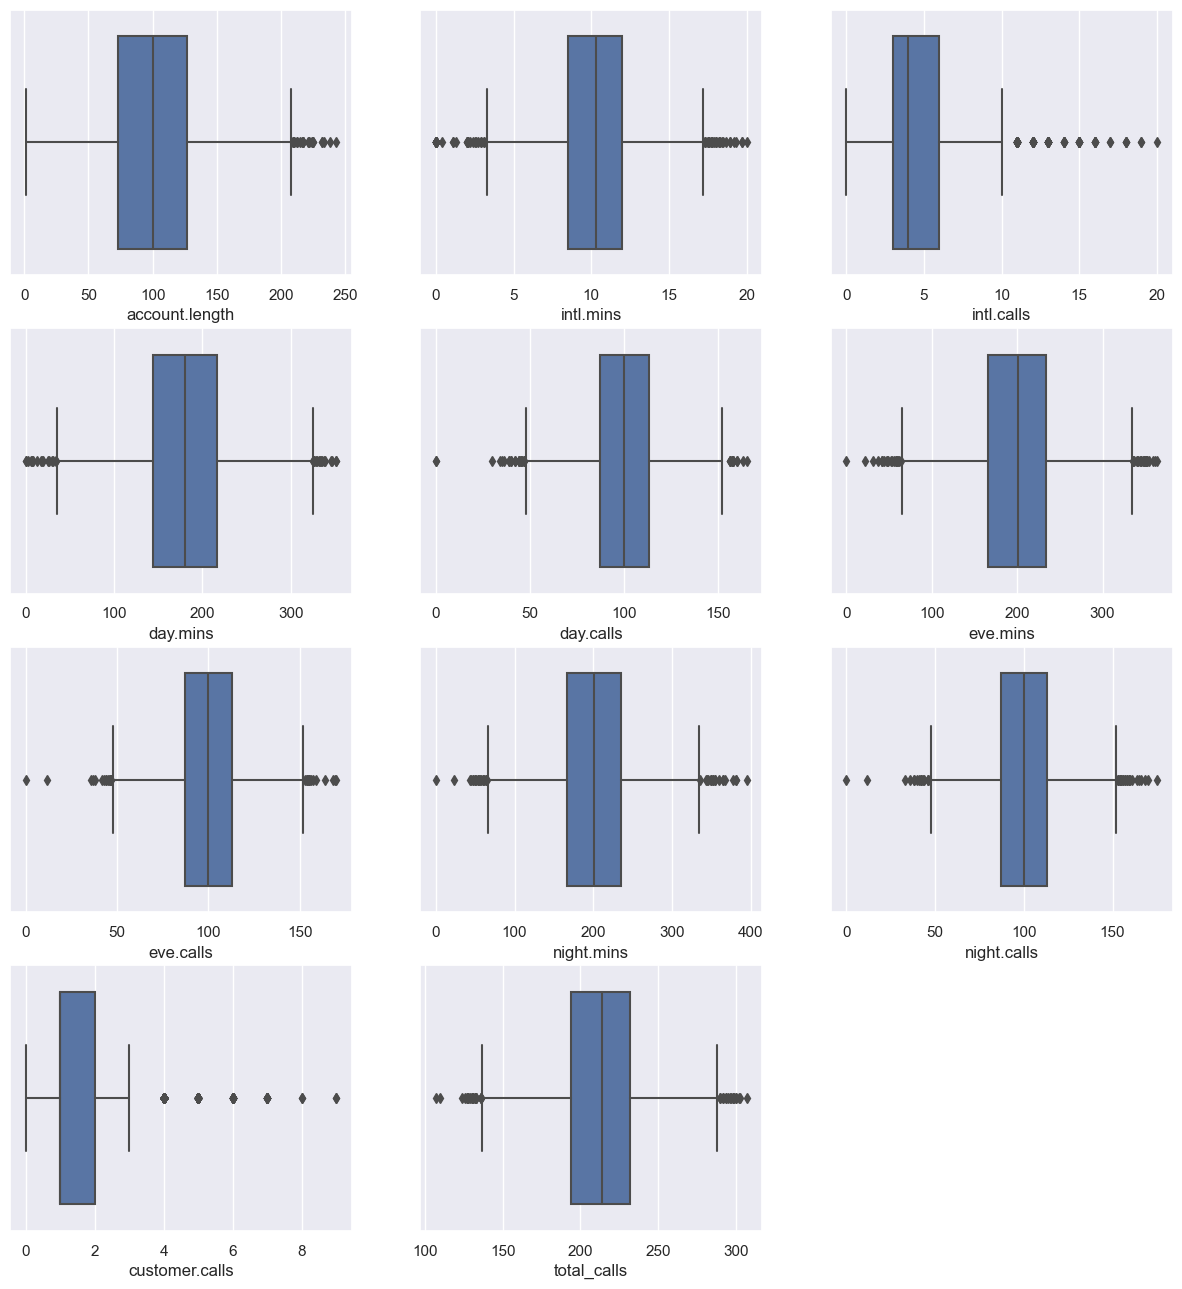

In [95]:
#Plot Outliers
n_rows = 5
n_columns = 3

plt.figure(figsize=(15,20))
for i in enumerate(cname):
    plt.subplot(n_rows,n_columns,i[0]+1)
    sns.boxplot(x=i[1],hue='churn',data=df)

In [96]:
#remove outliers 
x = ['account.length', 'voice.plan', 'intl.plan', 'intl.mins', 'intl.calls',
       'day.mins', 'day.calls', 'eve.mins', 'eve.calls', 'night.mins',
       'night.calls', 'customer.calls', 'churn', 'total_calls']

def count_outliers(data,col):
    q1 = data[col].quantile(0.25,interpolation='nearest')
    q2 = data[col].quantile(0.5,interpolation='nearest')
    q3 = data[col].quantile(0.75,interpolation='nearest')
    q4 = data[col].quantile(1,interpolation='nearest')
    IQR = q3-q1
    global LLP
    global ULP
    LLP = q1-1.5*IQR
    ULP = q3+1.5*IQR
    if data[col].min()>LLP and data[col].max()<ULP:
        print("No Outliers in",i)
    else :
        print("There are outliers",i)
        x = data[data[col]<LLP][col].size
        y = data[data[col]>ULP][col].size
        a.append(i)
        print('Count of outliers are:',x+y)
        
        
global a
a = []
for i in x :
    count_outliers(df,i) 

There are outliers account.length
Count of outliers are: 24
No Outliers in voice.plan
There are outliers intl.plan
Count of outliers are: 470
There are outliers intl.mins
Count of outliers are: 71
There are outliers intl.calls
Count of outliers are: 118
There are outliers day.mins
Count of outliers are: 34
There are outliers day.calls
Count of outliers are: 35
There are outliers eve.mins
Count of outliers are: 43
There are outliers eve.calls
Count of outliers are: 34
There are outliers night.mins
Count of outliers are: 40
There are outliers night.calls
Count of outliers are: 43
There are outliers customer.calls
Count of outliers are: 398
There are outliers churn
Count of outliers are: 705
There are outliers total_calls
Count of outliers are: 41


In [97]:
std_data = df.copy()

In [98]:
#Applying standarization as most of the variables are normalized distributed
def scale_standard(data):
    for i in cname:
        #print(i)
        data[i] = (data[i] - data[i].mean())/data[i].std()
    return data

In [99]:
#Standardizing Scale
data1 = scale_standard(std_data)

In [100]:
data1

,account.length,voice.plan,intl.plan,intl.mins,intl.calls,day.mins,day.calls,eve.mins,eve.calls,night.mins,night.calls,customer.calls,churn,total_calls
0,0.700163,1,0,-0.095655,-0.582675,1.572259,0.503029,-0.063646,-0.059237,0.876053,-0.448645,-0.437449,0,0.347971
1,0.171136,1,0,1.243956,-0.582675,-0.346853,1.158404,-0.101233,0.142441,1.068025,0.152587,-0.437449,0,0.948464
2,0.926889,0,0,0.700871,0.230501,1.169895,0.704683,-1.571047,0.495378,-0.748784,0.202689,-1.202292,0,0.807172
3,-0.408275,0,1,-1.326648,1.043676,2.208254,-1.463097,-2.744130,-0.613852,-0.069955,-0.548851,0.327394,0,-1.382862
4,-0.635001,0,1,-0.059449,-0.582675,-0.252288,0.654269,-1.034951,1.100413,-0.267864,1.054435,1.092237,0,1.160403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,-1.264796,1,0,-0.131860,0.230501,1.027120,1.360058,0.442777,1.302091,1.921015,0.803922,0.327394,0,2.043481
4996,1.304766,0,0,1.606013,-0.989262,0.072200,-0.505241,1.111414,-1.370146,0.260554,0.653614,1.092237,1,-1.382862
4997,-0.987686,0,0,1.207750,-0.176087,-0.736238,-0.555654,-0.550288,1.402930,0.236805,-0.148029,-0.437449,0,0.595233
4998,0.221519,0,0,-0.638740,0.637088,0.157494,-1.664751,-0.572048,-0.412174,0.474296,-0.548851,-1.202292,0,-1.347539


In [101]:
df.head(5)

,account.length,voice.plan,intl.plan,intl.mins,intl.calls,day.mins,day.calls,eve.mins,eve.calls,night.mins,night.calls,customer.calls,churn,total_calls
0,128,1,0,10.0,3,265.1,110,197.4,99,244.7,91,1,0,223
1,107,1,0,13.7,3,161.6,123,195.5,103,254.4,103,1,0,240
2,137,0,0,12.2,5,243.4,114,121.2,110,162.6,104,0,0,236
3,84,0,1,6.6,7,299.4,71,61.9,88,196.9,89,2,0,174
4,75,0,1,10.1,3,166.7,113,148.3,122,186.9,121,3,0,246


# Train & Test Split (80:20)

In [102]:
from sklearn.model_selection import train_test_split

In [103]:
X = data1.drop('churn', axis=1)

In [104]:
y = data1['churn']

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   test_size=0.3,random_state=42)  

In [106]:
(X_train.shape),(y_train.shape)

((3478, 13), (3478,))

In [107]:
(X_test.shape),(y_test.shape)

((1491, 13), (1491,))

# Using SMOTE ( SMOTE: Synthetic Minority Over-sampling Technique)
- Due to target variable imbalance, it's good to over sample the minority class .

In [108]:
from imblearn.over_sampling import SMOTE

Smo = SMOTE(random_state=42)
X_train_res, y_train_res = Smo.fit_resample(X_train, y_train)

In [109]:
(X_train_res.shape,y_train_res.shape)

((6020, 13), (6020,))

In [110]:
trained_set = pd.concat([X_train_res, y_train_res], axis=1)
trained_set

,account.length,voice.plan,intl.plan,intl.mins,intl.calls,day.mins,day.calls,eve.mins,eve.calls,night.mins,night.calls,customer.calls,total_calls,churn
0,1.380342,0,0,-0.530123,1.450263,0.806469,0.452615,0.648511,-1.622244,0.023063,0.553408,-0.437449,-0.676400,0
1,1.229191,1,0,-1.362854,-0.176087,-0.589755,0.301375,-1.703588,0.293700,-0.438066,-0.097927,-1.202292,0.383294,0
2,0.423054,0,0,0.121579,0.637088,0.005448,1.712952,0.316171,-0.210496,-1.967906,1.104538,1.857080,0.948464,1
3,0.019985,0,0,1.099133,1.043676,-0.817823,-0.404414,0.401234,0.495378,-0.069955,0.803922,1.092237,0.136032,0
4,0.297095,1,0,-0.095655,-0.582675,-1.235021,0.855923,-0.852955,-0.916370,-0.451920,0.904127,0.327394,-0.146553,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6015,-0.426667,0,0,-0.593760,0.729381,1.456513,2.151674,0.427019,0.114912,1.426763,-0.215192,-0.437449,1.774441,1
6016,-1.145996,0,0,0.519351,0.881593,-0.719132,-1.380998,0.771744,-1.521747,0.164976,1.064591,1.247282,-1.947313,1
6017,0.683521,0,0,0.115152,0.286235,0.965855,0.260704,-0.352342,1.092709,1.225369,0.212371,1.197080,1.065546,1
6018,0.545417,1,1,1.169072,-0.554905,0.768014,-0.649903,-0.489952,0.458424,0.213883,0.075722,-0.998021,-0.174855,1


In [111]:
tested_set = pd.concat([X_test, y_test], axis=1)
tested_set

,account.length,voice.plan,intl.plan,intl.mins,intl.calls,day.mins,day.calls,eve.mins,eve.calls,night.mins,night.calls,customer.calls,total_calls,churn
874,0.070369,0,0,0.049168,-0.582675,0.456022,0.351788,-1.294097,0.092022,0.153683,0.302895,2.621923,0.277325,0
3684,-1.088454,0,0,-0.421506,-0.989262,-0.244871,0.150135,-0.241686,0.596217,-1.762080,-1.300391,-0.437449,0.312648,0
4630,-0.534234,0,0,-0.855974,-0.176087,0.613630,0.351788,-0.483028,-0.916370,-0.402442,1.254846,-1.202292,-0.429138,0
4395,3.345301,0,0,-0.168066,-0.176087,-0.797427,-0.303587,0.628729,-0.664272,0.110143,0.252792,-0.437449,-0.676400,0
3895,0.019985,0,0,0.302608,0.637088,0.161202,1.107991,-0.423682,-0.462594,-0.269843,3.509466,-1.202292,0.489263,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010,-0.282316,0,0,0.881899,1.043676,-1.379650,2.569982,-0.217947,2.108804,-0.584519,-1.651109,-1.202292,3.315114,0
3868,-0.257125,0,0,-1.797322,-0.176087,1.014141,-1.160616,1.319127,-0.311335,0.428777,0.954230,1.092237,-1.029631,1
3751,-0.332700,0,0,2.185304,-1.395850,1.496236,-0.858135,-1.116058,-0.260915,1.661753,0.954230,1.857080,-0.782369,0
1337,-0.080782,0,1,-1.073209,-0.989262,1.049371,0.351788,-0.850977,0.243280,0.802826,1.004332,-1.202292,0.383294,1


In [112]:
print(trained_set['intl.plan'].unique())
print(trained_set['voice.plan'].unique())

[0 1]
[0 1]


In [113]:
#Import Library for label-encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [114]:
trained_set['voice.plan'] = le.fit_transform(trained_set['voice.plan'])
trained_set['intl.plan'] = le.fit_transform(trained_set['intl.plan'])

In [115]:
final_trained = trained_set.drop(['account.length'], axis=1)

In [116]:
final_trained

,voice.plan,intl.plan,intl.mins,intl.calls,day.mins,day.calls,eve.mins,eve.calls,night.mins,night.calls,customer.calls,total_calls,churn
0,0,0,-0.530123,1.450263,0.806469,0.452615,0.648511,-1.622244,0.023063,0.553408,-0.437449,-0.676400,0
1,1,0,-1.362854,-0.176087,-0.589755,0.301375,-1.703588,0.293700,-0.438066,-0.097927,-1.202292,0.383294,0
2,0,0,0.121579,0.637088,0.005448,1.712952,0.316171,-0.210496,-1.967906,1.104538,1.857080,0.948464,1
3,0,0,1.099133,1.043676,-0.817823,-0.404414,0.401234,0.495378,-0.069955,0.803922,1.092237,0.136032,0
4,1,0,-0.095655,-0.582675,-1.235021,0.855923,-0.852955,-0.916370,-0.451920,0.904127,0.327394,-0.146553,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6015,0,0,-0.593760,0.729381,1.456513,2.151674,0.427019,0.114912,1.426763,-0.215192,-0.437449,1.774441,1
6016,0,0,0.519351,0.881593,-0.719132,-1.380998,0.771744,-1.521747,0.164976,1.064591,1.247282,-1.947313,1
6017,0,0,0.115152,0.286235,0.965855,0.260704,-0.352342,1.092709,1.225369,0.212371,1.197080,1.065546,1
6018,1,1,1.169072,-0.554905,0.768014,-0.649903,-0.489952,0.458424,0.213883,0.075722,-0.998021,-0.174855,1


In [117]:
final_tested = tested_set.drop(['account.length'], axis=1)

In [118]:
final_tested

,voice.plan,intl.plan,intl.mins,intl.calls,day.mins,day.calls,eve.mins,eve.calls,night.mins,night.calls,customer.calls,total_calls,churn
874,0,0,0.049168,-0.582675,0.456022,0.351788,-1.294097,0.092022,0.153683,0.302895,2.621923,0.277325,0
3684,0,0,-0.421506,-0.989262,-0.244871,0.150135,-0.241686,0.596217,-1.762080,-1.300391,-0.437449,0.312648,0
4630,0,0,-0.855974,-0.176087,0.613630,0.351788,-0.483028,-0.916370,-0.402442,1.254846,-1.202292,-0.429138,0
4395,0,0,-0.168066,-0.176087,-0.797427,-0.303587,0.628729,-0.664272,0.110143,0.252792,-0.437449,-0.676400,0
3895,0,0,0.302608,0.637088,0.161202,1.107991,-0.423682,-0.462594,-0.269843,3.509466,-1.202292,0.489263,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010,0,0,0.881899,1.043676,-1.379650,2.569982,-0.217947,2.108804,-0.584519,-1.651109,-1.202292,3.315114,0
3868,0,0,-1.797322,-0.176087,1.014141,-1.160616,1.319127,-0.311335,0.428777,0.954230,1.092237,-1.029631,1
3751,0,0,2.185304,-1.395850,1.496236,-0.858135,-1.116058,-0.260915,1.661753,0.954230,1.857080,-0.782369,0
1337,0,1,-1.073209,-0.989262,1.049371,0.351788,-0.850977,0.243280,0.802826,1.004332,-1.202292,0.383294,1


# Model Building

In [119]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost
from xgboost import XGBClassifier
from scipy.stats import uniform
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score

# Logistic Regression

In [120]:
from sklearn.linear_model import LogisticRegression
#logistic without binaries
logit_model = LogisticRegression(random_state=42).fit(X_train_res,y_train_res)

In [121]:
logit_model.coef_

array([[ 0.04859318, -1.9335852 ,  1.84877528,  0.21685961, -0.13144759,
         0.79422754,  0.26871526,  0.33246163,  0.13513341,  0.274388  ,
        -0.1598518 ,  0.86497831, -0.2840407 ]])

In [122]:
#Model Score on Valdation Data Set
y_pred_1 = logit_model.predict(X_test)

In [123]:
#Probability of getting '0' and '1'
logit_model.predict_proba(X_test)

array([[0.12687373, 0.87312627],
       [0.78492175, 0.21507825],
       [0.81811537, 0.18188463],
       ...,
       [0.05016001, 0.94983999],
       [0.27940639, 0.72059361],
       [0.6433528 , 0.3566472 ]])

In [124]:
y_pred_1

array([1, 0, 0, ..., 1, 1, 0])

In [125]:
print(confusion_matrix(y_test,y_pred_1))

[[965 289]
 [ 59 178]]


In [126]:
pd.crosstab(y_pred_1,y_test)

churn,0,1
row_0,,
0,965,59
1,289,178


In [127]:
#calculation based on formula
accuracy = sum(y_test==y_pred_1)/final_tested.shape[0]
accuracy

0.7665995975855131

In [128]:
from sklearn.metrics import classification_report 
print (classification_report (y_test, y_pred_1))  

              precision    recall  f1-score   support

           0       0.94      0.77      0.85      1254
           1       0.38      0.75      0.51       237

    accuracy                           0.77      1491
   macro avg       0.66      0.76      0.68      1491
weighted avg       0.85      0.77      0.79      1491



In [129]:
logit_roc_curve = roc_auc_score(y_test,logit_model.predict(X_test))
logit_roc_curve

0.7602961661922356

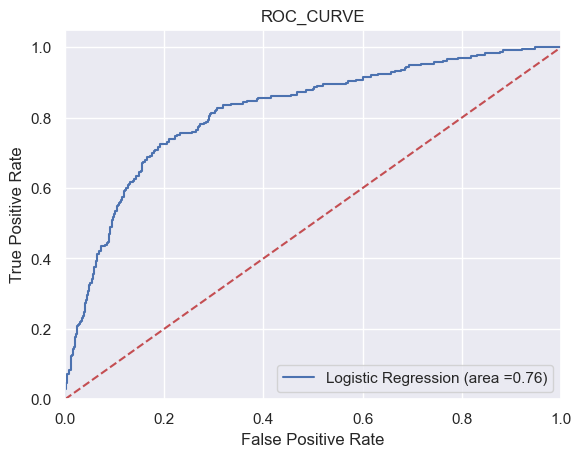

In [130]:
fpr,tpr,thresholds = roc_curve(y_test,logit_model.predict_proba(X_test)[:,1])
plt.plot(fpr,tpr,label = 'Logistic Regression (area =%0.2f)'% logit_roc_curve)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_CURVE')
plt.legend(loc = "lower right")
plt.show()

In [131]:
import statsmodels.api as sm   

In [132]:
logit = sm.Logit(y, X)   

In [133]:
logit.fit().summary()  

Optimization terminated successfully.
         Current function value: 0.547253
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  churn   No. Observations:                 4969
Model:                          Logit   Df Residuals:                     4956
Method:                           MLE   Df Model:                           12
Date:                Tue, 18 Jul 2023   Pseudo R-squ.:                 -0.3401
Time:                        17:17:51   Log-Likelihood:                -2719.3
converged:                       True   LL-Null:                       -2029.1
Covariance Type:            nonrobust   LLR p-value:                     1.000
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
account.length     0.0379      0.033      1.155      0.248      -0.026       0.102
voice.plan        -2.6693      0.108    -24.792      0.000      -2.880      -2.458
intl.plan          0.1825      0.108      1.695      0.090      -0.029       0.394
intl.mins          0.1344      0.033      4.068      0.000       0.070       0.199
intl.calls         0.2882      0.284      1.016      0.310      -0.268       0.844
day.mins           0.3922      0.034     11.598      0.000       0.326       0.459
day.calls          3.0884      2.272      1.359      0.174      -1.365       7.542
eve.mins           0.2036      0.033      6.149      0.000       0.139       0.268
eve.calls          3.0376      2.271      1.337      0.181      -1.414       7.490
night.mins         0.4411      0.262      1.682      0.093      -0.073       0.955
night.calls       -0.0084      0.033     -0.256      0.798      -0.072       0.056
customer.calls     0.3829      0.034     11.406      0.000       0.317       0.449
total_calls       -4.3642      3.243     -1.346      0.178     -10.720       1.992
==================================================================================
"""

In [134]:
fpr

array([0.        , 0.        , 0.        , 0.0015949 , 0.0015949 ,
       0.00239234, 0.00239234, 0.00318979, 0.00318979, 0.00398724,
       0.00398724, 0.00478469, 0.00478469, 0.00797448, 0.00797448,
       0.00877193, 0.00877193, 0.01116427, 0.01116427, 0.01196172,
       0.01196172, 0.01275917, 0.01275917, 0.01355662, 0.01355662,
       0.01594896, 0.01594896, 0.01754386, 0.01754386, 0.0199362 ,
       0.0199362 , 0.02073365, 0.02073365, 0.023126  , 0.023126  ,
       0.02392344, 0.02392344, 0.02472089, 0.02472089, 0.02711324,
       0.02711324, 0.02791069, 0.02791069, 0.03110048, 0.03110048,
       0.03269537, 0.03269537, 0.03508772, 0.03508772, 0.03588517,
       0.03588517, 0.03748006, 0.03748006, 0.03987241, 0.03987241,
       0.04066986, 0.04066986, 0.04226475, 0.04226475, 0.04385965,
       0.04385965, 0.04545455, 0.04545455, 0.04625199, 0.04625199,
       0.04784689, 0.04784689, 0.04864434, 0.04864434, 0.05103668,
       0.05103668, 0.05342903, 0.05342903, 0.05502392, 0.05502

In [135]:
tpr

array([0.        , 0.00421941, 0.02953586, 0.02953586, 0.04219409,
       0.04219409, 0.0464135 , 0.0464135 , 0.05907173, 0.05907173,
       0.06329114, 0.06329114, 0.07172996, 0.07172996, 0.07594937,
       0.07594937, 0.08438819, 0.08438819, 0.09704641, 0.09704641,
       0.10548523, 0.10548523, 0.12236287, 0.12236287, 0.12658228,
       0.12658228, 0.14345992, 0.14345992, 0.14767932, 0.14767932,
       0.16877637, 0.16877637, 0.17721519, 0.17721519, 0.18565401,
       0.18565401, 0.19831224, 0.19831224, 0.20675105, 0.20675105,
       0.21097046, 0.21097046, 0.21518987, 0.21518987, 0.21940928,
       0.21940928, 0.22362869, 0.22362869, 0.23206751, 0.23206751,
       0.23628692, 0.23628692, 0.24894515, 0.24894515, 0.25738397,
       0.25738397, 0.2742616 , 0.2742616 , 0.28270042, 0.28270042,
       0.29535865, 0.29535865, 0.29957806, 0.29957806, 0.30801688,
       0.30801688, 0.32067511, 0.32067511, 0.32489451, 0.32489451,
       0.32911392, 0.32911392, 0.33333333, 0.33333333, 0.34177

In [136]:
from sklearn.metrics import accuracy_score
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(logit_model.predict_proba(X_test)[:,1]>thres,1,0)
    accuracy_ls.append(accuracy_score(y_test, y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],
                        axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls  

,thresholds,accuracy
37,0.887831,0.852448
38,0.881745,0.852448
41,0.879541,0.851777
36,0.888002,0.851777
91,0.765201,0.851777
...,...,...
313,0.040659,0.224011
314,0.040170,0.223340
315,0.029518,0.202549
316,0.029360,0.201878


### Calculation based on Best Threshold

In [137]:
from numpy import argmax
J = tpr - fpr
ix = argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh))

Best Threshold=0.545544


In [138]:
threshold = 0.545544
preds = np.where(logit_model.predict_proba(X_test)[:,1] > threshold, 1, 0)
print(classification_report(y_test,preds))   

              precision    recall  f1-score   support

           0       0.94      0.81      0.87      1254
           1       0.42      0.73      0.53       237

    accuracy                           0.79      1491
   macro avg       0.68      0.77      0.70      1491
weighted avg       0.86      0.79      0.81      1491



# DecisionTree Classifier

### Using Entropy

In [139]:
from sklearn import tree

In [140]:
dt_model = DecisionTreeClassifier(criterion= 'entropy', max_depth=3)
dt_model.fit(X_train_res,y_train_res)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

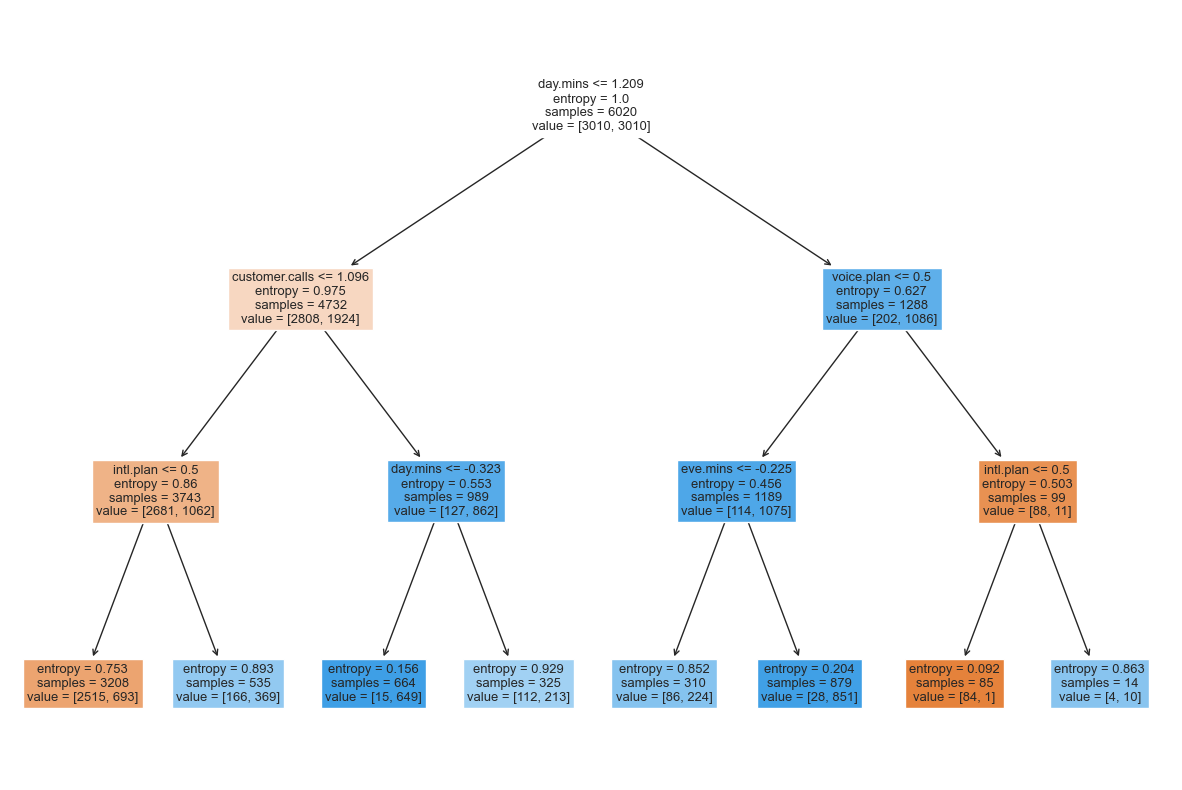

In [141]:
# Plot the decision tree
plt.figure(figsize=(15, 10))
tree.plot_tree(dt_model, feature_names=X_train_res.columns, filled=True)
plt.show()

In [142]:
text = tree.export_text(dt_model,max_depth=3)
print(text)

|--- feature_5 <= 1.21
|   |--- feature_11 <= 1.10
|   |   |--- feature_2 <= 0.50
|   |   |   |--- class: 0
|   |   |--- feature_2 >  0.50
|   |   |   |--- class: 1
|   |--- feature_11 >  1.10
|   |   |--- feature_5 <= -0.32
|   |   |   |--- class: 1
|   |   |--- feature_5 >  -0.32
|   |   |   |--- class: 1
|--- feature_5 >  1.21
|   |--- feature_1 <= 0.50
|   |   |--- feature_7 <= -0.23
|   |   |   |--- class: 1
|   |   |--- feature_7 >  -0.23
|   |   |   |--- class: 1
|   |--- feature_1 >  0.50
|   |   |--- feature_2 <= 0.50
|   |   |   |--- class: 0
|   |   |--- feature_2 >  0.50
|   |   |   |--- class: 1



In [143]:
dt_model.feature_importances_

array([0.        , 0.09537282, 0.15831775, 0.        , 0.        ,
       0.32865198, 0.        , 0.04377955, 0.        , 0.        ,
       0.        , 0.37387789, 0.        ])

In [144]:
feature_imp = pd.Series(dt_model.feature_importances_).sort_values(ascending=True)
feature_imp

0     0.000000
3     0.000000
4     0.000000
6     0.000000
8     0.000000
9     0.000000
10    0.000000
12    0.000000
7     0.043780
1     0.095373
2     0.158318
5     0.328652
11    0.373878
dtype: float64

In [145]:
y_pred_2 = dt_model.predict(X_test)
y_pred_2

array([1, 0, 0, ..., 1, 1, 0])

In [146]:
print(confusion_matrix(y_test,y_pred_2))

[[1078  176]
 [  51  186]]


In [147]:
pd.crosstab(y_pred_2,y_test)

churn,0,1
row_0,,
0,1078,51
1,176,186


In [148]:
print(classification_report(y_test,y_pred_2))   

              precision    recall  f1-score   support

           0       0.95      0.86      0.90      1254
           1       0.51      0.78      0.62       237

    accuracy                           0.85      1491
   macro avg       0.73      0.82      0.76      1491
weighted avg       0.88      0.85      0.86      1491



In [149]:
dt_roc_curve = roc_auc_score(y_test,dt_model.predict(X_test))
dt_roc_curve

0.822229624694648

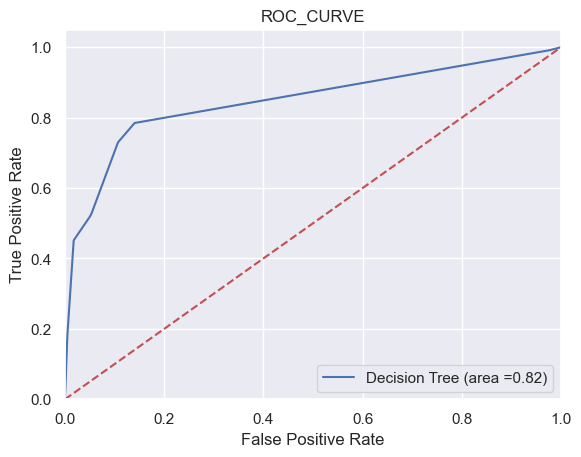

In [150]:
fpr,tpr,thresholds = roc_curve(y_test,dt_model.predict_proba(X_test)[:,1])
plt.plot(fpr,tpr,label = 'Decision Tree (area =%0.2f)'% dt_roc_curve)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_CURVE')
plt.legend(loc = "lower right")
plt.show()

### Using Gini

In [151]:
dt_model = DecisionTreeClassifier(criterion= 'gini', max_depth=3)
dt_model.fit(X_train_res,y_train_res)

DecisionTreeClassifier(max_depth=3)

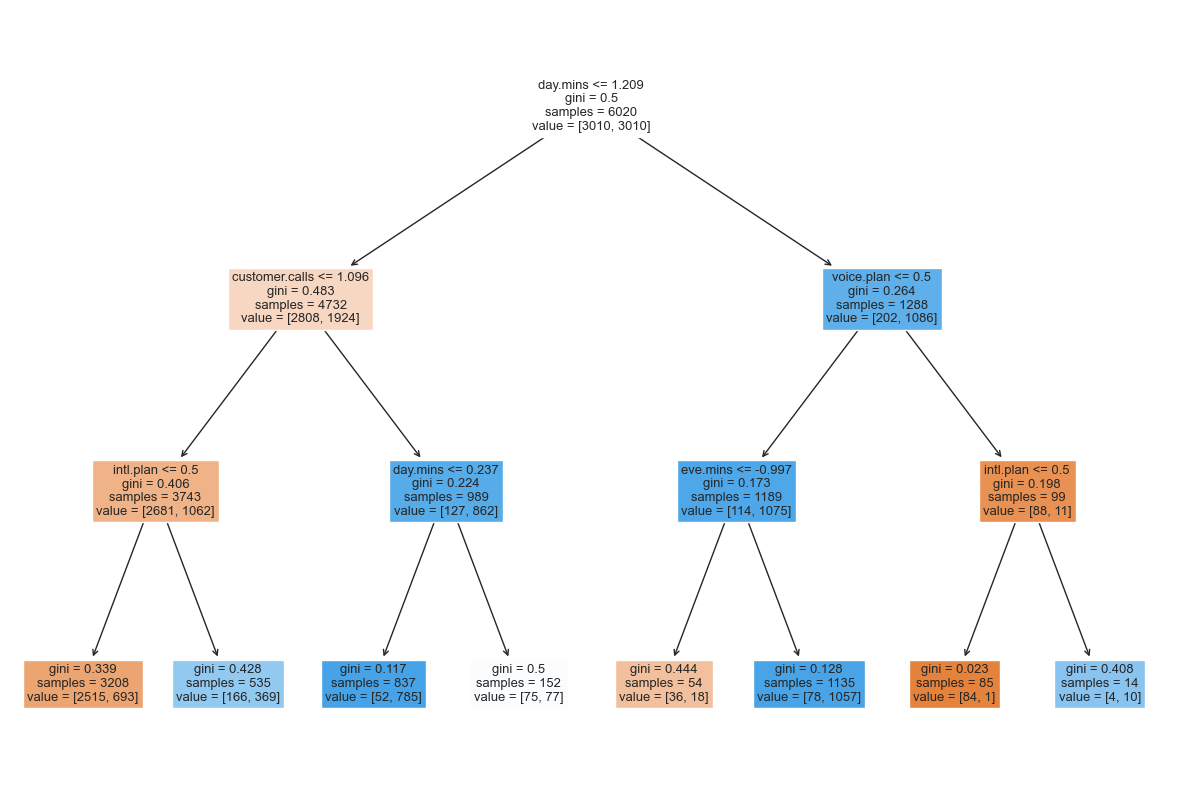

In [152]:
# Plot the decision tree
plt.figure(figsize=(15, 10))
tree.plot_tree(dt_model, feature_names=X_train_res.columns, filled=True)
plt.show()

In [153]:
text = tree.export_text(dt_model,max_depth=3)
print(text)

|--- feature_5 <= 1.21
|   |--- feature_11 <= 1.10
|   |   |--- feature_2 <= 0.50
|   |   |   |--- class: 0
|   |   |--- feature_2 >  0.50
|   |   |   |--- class: 1
|   |--- feature_11 >  1.10
|   |   |--- feature_5 <= 0.24
|   |   |   |--- class: 1
|   |   |--- feature_5 >  0.24
|   |   |   |--- class: 1
|--- feature_5 >  1.21
|   |--- feature_1 <= 0.50
|   |   |--- feature_7 <= -1.00
|   |   |   |--- class: 0
|   |   |--- feature_7 >  -1.00
|   |   |   |--- class: 1
|   |--- feature_1 >  0.50
|   |   |--- feature_2 <= 0.50
|   |   |   |--- class: 0
|   |   |--- feature_2 >  0.50
|   |   |   |--- class: 1



In [154]:
dt_model.feature_importances_

array([0.        , 0.08552905, 0.16194605, 0.        , 0.        ,
       0.32277798, 0.        , 0.02742737, 0.        , 0.        ,
       0.        , 0.40231955, 0.        ])

In [155]:
feature_imp = pd.Series(dt_model.feature_importances_).sort_values(ascending=True)
feature_imp

0     0.000000
3     0.000000
4     0.000000
6     0.000000
8     0.000000
9     0.000000
10    0.000000
12    0.000000
7     0.027427
1     0.085529
2     0.161946
5     0.322778
11    0.402320
dtype: float64

In [156]:
preds = dt_model.predict(X_test)
preds

array([1, 0, 0, ..., 0, 1, 0])

In [157]:
print(confusion_matrix(y_test,y_pred))

[[   1 1253]
 [   0  237]]


In [158]:
pd.crosstab(y_pred,y_test)

churn,0,1
row_0,,
0,1,0
1,1253,237


In [159]:
print(classification_report(y_test,preds))   

              precision    recall  f1-score   support

           0       0.95      0.88      0.91      1254
           1       0.54      0.76      0.63       237

    accuracy                           0.86      1491
   macro avg       0.75      0.82      0.77      1491
weighted avg       0.89      0.86      0.87      1491



In [160]:
dt_roc_curve = roc_auc_score(y_test,dt_model.predict(X_test))
dt_roc_curve

0.8204530313124584

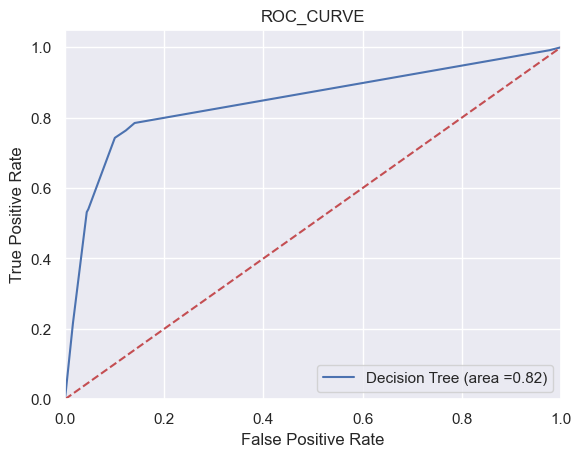

In [161]:
fpr,tpr,thresholds = roc_curve(y_test,dt_model.predict_proba(X_test)[:,1])
plt.plot(fpr,tpr,label = 'Decision Tree (area =%0.2f)'% dt_roc_curve)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_CURVE')
plt.legend(loc = "lower right")
plt.show()

# RandomForest Classifier

In [162]:
rf_model = RandomForestClassifier(n_estimators=100,random_state=42)
rf_model.fit(X_train_res,y_train_res)

RandomForestClassifier(random_state=42)

In [163]:
y_pred_3 = rf_model.predict(X_test)

In [164]:
y_pred_3

array([1, 0, 0, ..., 1, 1, 0])

In [165]:
print(confusion_matrix(y_test,y_pred_3))

[[1218   36]
 [  49  188]]


In [166]:
pd.crosstab(y_pred_3,y_test)

churn,0,1
row_0,,
0,1218,49
1,36,188


In [167]:
print(classification_report(y_test,y_pred_3))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1254
           1       0.84      0.79      0.82       237

    accuracy                           0.94      1491
   macro avg       0.90      0.88      0.89      1491
weighted avg       0.94      0.94      0.94      1491



In [168]:
rf_roc_curve = roc_auc_score(y_test,rf_model.predict(X_test))
rf_roc_curve

0.8822704055881938

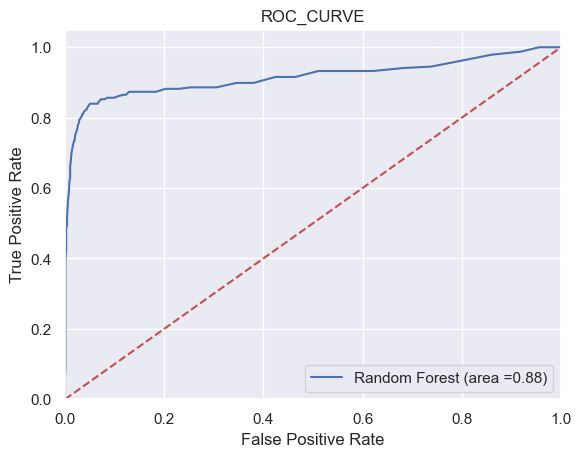

In [169]:
fpr,tpr,thresholds = roc_curve(y_test,rf_model.predict_proba(X_test)[:,1])
plt.plot(fpr,tpr,label = 'Random Forest (area =%0.2f)'% rf_roc_curve)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_CURVE')
plt.legend(loc = "lower right")
plt.show()

# XGBoost Classifier

In [170]:
xgb_model = XGBClassifier(max_depth=6, n_estimators=500,learning_rate=0.03,gamma=0.5,objective='binary:logistic')
xgb_model.fit(X_train_res,y_train_res)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.5, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.03, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [171]:
y_pred_4 = xgb_model.predict(X_test)

In [172]:
y_pred_4

array([1, 0, 0, ..., 1, 1, 0])

In [173]:
print(confusion_matrix(y_test,y_pred_4))

[[1232   22]
 [  50  187]]


In [174]:
pd.crosstab(y_pred_4,y_test)

churn,0,1
row_0,,
0,1232,50
1,22,187


In [175]:
print(classification_report(y_test,y_pred_4))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1254
           1       0.89      0.79      0.84       237

    accuracy                           0.95      1491
   macro avg       0.93      0.89      0.91      1491
weighted avg       0.95      0.95      0.95      1491



In [176]:
xgb_roc_curve = roc_auc_score(y_test,xgb_model.predict(X_test))
xgb_roc_curve

0.885742838107928

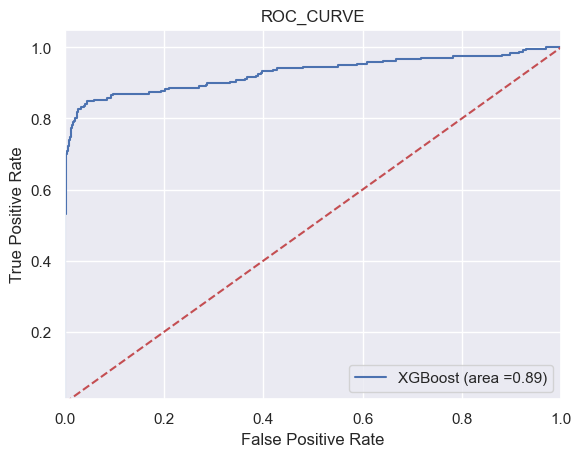

In [177]:
fpr,tpr,thresholds = roc_curve(y_test,xgb_model.predict_proba(X_test)[:,1])
plt.plot(fpr,tpr,label = 'XGBoost (area =%0.2f)'% xgb_roc_curve)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.01,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_CURVE')
plt.legend(loc = "lower right")
plt.show()

# Support Vector Machine

In [178]:
# Grid Search To Get Best Hyperparameters
parameters = {'C':[0.01,0.1,1,3,5,10]}
svm_clf = SVC(class_weight='balanced',random_state=42, probability=True)
svm_model = GridSearchCV(estimator=svm_clf, param_grid=parameters,scoring='accuracy',return_train_score=True,verbose=1)
svm_model.fit(X_train_res,y_train_res)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(estimator=SVC(class_weight='balanced', probability=True,
                           random_state=42),
             param_grid={'C': [0.01, 0.1, 1, 3, 5, 10]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [179]:
svm_model.best_estimator_

SVC(C=10, class_weight='balanced', probability=True, random_state=42)

In [180]:
y_pred_5 = svm_model.predict(X_test)

In [181]:
y_pred_5

array([1, 0, 0, ..., 1, 0, 0])

In [182]:
print(confusion_matrix(y_test,y_pred_5))

[[1166   88]
 [  88  149]]


In [183]:
pd.crosstab(y_pred_5,y_test)

churn,0,1
row_0,,
0,1166,88
1,88,149


In [184]:
print(classification_report(y_test,y_pred_5))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1254
           1       0.63      0.63      0.63       237

    accuracy                           0.88      1491
   macro avg       0.78      0.78      0.78      1491
weighted avg       0.88      0.88      0.88      1491



In [185]:
svm_roc_curve = roc_auc_score(y_test,svm_model.predict(X_test))
svm_roc_curve

0.7792582722629359

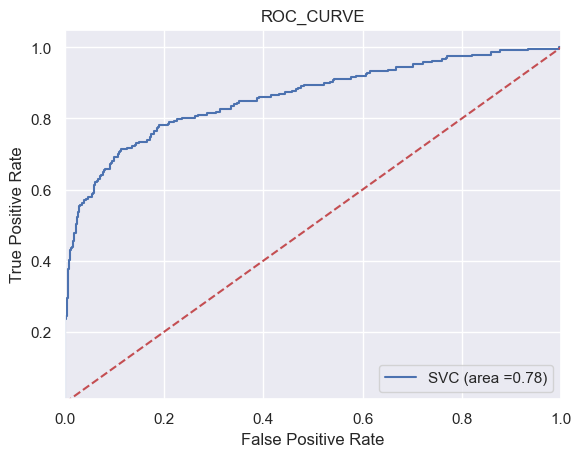

In [186]:
fpr,tpr,thresholds = roc_curve(y_test,svm_model.predict_proba(X_test)[:,1])
plt.plot(fpr,tpr,label = 'SVC (area =%0.2f)'% svm_roc_curve)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.01,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_CURVE')
plt.legend(loc = "lower right")
plt.show()

# KNN using Grid Search

In [187]:
import numpy
from sklearn.model_selection import GridSearchCV

In [188]:
n_neighbors = numpy.array(range(1,40))
param_grid = dict(n_neighbors=n_neighbors)

In [189]:
model = KNeighborsClassifier()
KNN_model = GridSearchCV(estimator=model, param_grid=param_grid, cv=10, scoring='accuracy', return_train_score=False, verbose=1)
KNN_model.fit(X_train_res,y_train_res)

Fitting 10 folds for each of 39 candidates, totalling 390 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])},
             scoring='accuracy', verbose=1)

In [190]:
y_pred_6 = KNN_model.predict(X_test)
y_pred_6

array([0, 0, 0, ..., 1, 0, 0])

In [191]:
print(confusion_matrix(y_test,y_pred_6))

[[1139  115]
 [ 126  111]]


In [192]:
pd.crosstab(y_pred_6,y_test)

churn,0,1
row_0,,
0,1139,126
1,115,111


In [193]:
print(classification_report(y_test,y_pred_6))

              precision    recall  f1-score   support

           0       0.90      0.91      0.90      1254
           1       0.49      0.47      0.48       237

    accuracy                           0.84      1491
   macro avg       0.70      0.69      0.69      1491
weighted avg       0.84      0.84      0.84      1491



In [194]:
KNN_roc_curve = roc_auc_score(y_test,KNN_model.predict(X_test))
KNN_roc_curve

0.6883239456523934

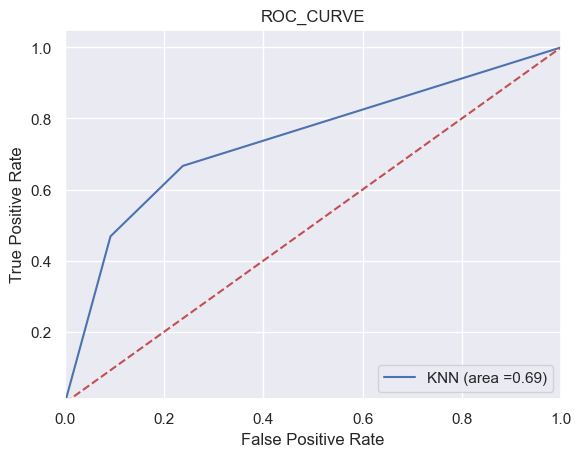

In [195]:
fpr,tpr,thresholds = roc_curve(y_test,KNN_model.predict_proba(X_test)[:,1])
plt.plot(fpr,tpr,label = 'KNN (area =%0.2f)'% KNN_roc_curve)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.01,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_CURVE')
plt.legend(loc = "lower right")
plt.show()

# Navie Bayes

In [196]:
Naive_model = GaussianNB().fit(X_train_res,y_train_res)

In [197]:
y_pred_7 = Naive_model.predict(X_test)
y_pred_7

array([1, 0, 0, ..., 1, 1, 0])

In [198]:
print(confusion_matrix(y_test,y_pred_7))

[[944 310]
 [ 56 181]]


In [199]:
pd.crosstab(y_pred_7,y_test)

churn,0,1
row_0,,
0,944,56
1,310,181


In [200]:
print(classification_report(y_test,y_pred_7))

              precision    recall  f1-score   support

           0       0.94      0.75      0.84      1254
           1       0.37      0.76      0.50       237

    accuracy                           0.75      1491
   macro avg       0.66      0.76      0.67      1491
weighted avg       0.85      0.75      0.78      1491



In [201]:
Naive_roc_curve = roc_auc_score(y_test,Naive_model.predict(X_test))
Naive_roc_curve

0.7582520743746592

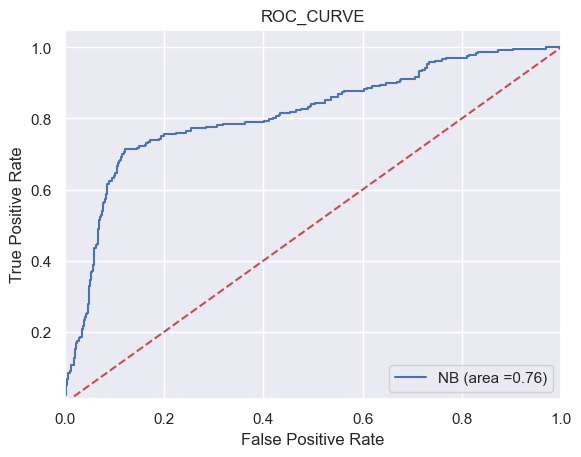

In [202]:
fpr,tpr,thresholds = roc_curve(y_test,Naive_model.predict_proba(X_test)[:,1])
plt.plot(fpr,tpr,label = 'NB (area =%0.2f)'% Naive_roc_curve)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.01,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_CURVE')
plt.legend(loc = "lower right")
plt.show()

In [203]:
Results = pd.DataFrame({'Models':['LR','DT','RF','XGB','SVM','KNN','NB'],
                        'ACC': [accuracy_score(y_test,y_pred_1),
                               accuracy_score(y_test,y_pred_2),
                               accuracy_score(y_test,y_pred_3),
                               accuracy_score(y_test,y_pred_4),
                               accuracy_score(y_test,y_pred_5),
                               accuracy_score(y_test,y_pred_6),
                               accuracy_score(y_test,y_pred_7)]})               

In [204]:
Results

,Models,ACC
0,LR,0.766600
1,DT,0.847753
2,RF,0.942991
3,XGB,0.951710
4,SVM,0.881958
5,KNN,0.838364
6,NB,0.754527


In [205]:
Results = pd.DataFrame({'Models':['LR','DT','RF','XGB','SVM','KNN','NB'],
                        'PRE': [precision_score(y_test,y_pred_1),
                               precision_score(y_test,y_pred_2),
                               precision_score(y_test,y_pred_3),
                               precision_score(y_test,y_pred_4),
                               precision_score(y_test,y_pred_5),
                               precision_score(y_test,y_pred_6),
                               precision_score(y_test,y_pred_7)]})               

In [206]:
Results

,Models,PRE
0,LR,0.381156
1,DT,0.513812
2,RF,0.839286
3,XGB,0.894737
4,SVM,0.628692
5,KNN,0.491150
6,NB,0.368635


# Churn Risk Scores

In [207]:
# Generate churn risk scores
churn_risk_scores = xgb_model.predict_proba(X_test)[:, 1] 

In [208]:
churn_risk_scores

array([0.80285037, 0.07476046, 0.0321054 , ..., 0.8035013 , 0.98379   ,
       0.07868031], dtype=float32)

In [209]:
# Add churn risk scores to the test set
X_test_with_scores = X_test.copy()
X_test_with_scores['churn_risk_score'] = churn_risk_scores *100

In [210]:
X_test_with_scores['Churned'] = y_test
X_test_with_scores['prediction'] = y_pred_4
X_test_with_scores['FLAG'] = X_test_with_scores['prediction'].apply(lambda x: 'YES' if x == 1 else 'NO')

In [211]:
X_test_with_scores.head()

,account.length,voice.plan,intl.plan,intl.mins,intl.calls,day.mins,day.calls,eve.mins,eve.calls,night.mins,night.calls,customer.calls,total_calls,churn_risk_score,Churned,prediction,FLAG
874,0.070369,0,0,0.049168,-0.582675,0.456022,0.351788,-1.294097,0.092022,0.153683,0.302895,2.621923,0.277325,80.285034,0,1,YES
3684,-1.088454,0,0,-0.421506,-0.989262,-0.244871,0.150135,-0.241686,0.596217,-1.762080,-1.300391,-0.437449,0.312648,7.476046,0,0,NO
4630,-0.534234,0,0,-0.855974,-0.176087,0.613630,0.351788,-0.483028,-0.916370,-0.402442,1.254846,-1.202292,-0.429138,3.210540,0,0,NO
4395,3.345301,0,0,-0.168066,-0.176087,-0.797427,-0.303587,0.628729,-0.664272,0.110143,0.252792,-0.437449,-0.676400,3.640497,0,0,NO
3895,0.019985,0,0,0.302608,0.637088,0.161202,1.107991,-0.423682,-0.462594,-0.269843,3.509466,-1.202292,0.489263,2.815499,0,0,NO


In [212]:
X_test_with_scores.dtypes

account.length      float64
voice.plan            int32
intl.plan             int32
intl.mins           float64
intl.calls          float64
day.mins            float64
day.calls           float64
eve.mins            float64
eve.calls           float64
night.mins          float64
night.calls         float64
customer.calls      float64
total_calls         float64
churn_risk_score    float32
Churned               int32
prediction            int32
FLAG                 object
dtype: object

# Deployment

In [213]:
import pickle

In [214]:
with open('standard_scaler.pkl', 'wb') as f:
    pickle.dump(data1, f)

In [215]:
with open('data.pkl', 'wb') as f:
    pickle.dump(data, f)

In [216]:
data

,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
0,KS,415,128,yes,25,no,10.0,3,2.70,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,1,no
1,OH,415,107,yes,26,no,13.7,3,3.70,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,1,no
2,NJ,415,137,no,0,no,12.2,5,3.29,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,0,no
3,OH,408,84,no,0,yes,6.6,7,1.78,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,2,no
4,OK,415,75,no,0,yes,10.1,3,2.73,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,HI,408,50,yes,40,no,9.9,5,2.67,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,2,no
4996,WV,415,152,no,0,no,14.7,2,3.97,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,3,yes
4997,DC,415,61,no,0,no,13.6,4,3.67,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,1,no
4998,DC,510,109,no,0,no,8.5,6,2.30,188.8,67,32.10,171.7,92,14.59,224.4,89,10.10,0,no


In [217]:
df

,account.length,voice.plan,intl.plan,intl.mins,intl.calls,day.mins,day.calls,eve.mins,eve.calls,night.mins,night.calls,customer.calls,churn,total_calls
0,128,1,0,10.0,3,265.1,110,197.4,99,244.7,91,1,0,223
1,107,1,0,13.7,3,161.6,123,195.5,103,254.4,103,1,0,240
2,137,0,0,12.2,5,243.4,114,121.2,110,162.6,104,0,0,236
3,84,0,1,6.6,7,299.4,71,61.9,88,196.9,89,2,0,174
4,75,0,1,10.1,3,166.7,113,148.3,122,186.9,121,3,0,246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,50,1,0,9.9,5,235.7,127,223.0,126,297.5,116,2,0,271
4996,152,0,0,14.7,2,184.2,90,256.8,73,213.6,113,3,1,174
4997,61,0,0,13.6,4,140.6,89,172.8,128,212.4,97,1,0,230
4998,109,0,0,8.5,6,188.8,67,171.7,92,224.4,89,0,0,175


In [218]:
df.to_excel('finaldata.xlsx', index=False)

In [219]:
df.head()

,account.length,voice.plan,intl.plan,intl.mins,intl.calls,day.mins,day.calls,eve.mins,eve.calls,night.mins,night.calls,customer.calls,churn,total_calls
0,128,1,0,10.0,3,265.1,110,197.4,99,244.7,91,1,0,223
1,107,1,0,13.7,3,161.6,123,195.5,103,254.4,103,1,0,240
2,137,0,0,12.2,5,243.4,114,121.2,110,162.6,104,0,0,236
3,84,0,1,6.6,7,299.4,71,61.9,88,196.9,89,2,0,174
4,75,0,1,10.1,3,166.7,113,148.3,122,186.9,121,3,0,246
